In [ ]:
%run setup.ipynb

# generate data

In [27]:
filename = '0714model5'

In [83]:
conv = pd.read_excel('../data/對照清單.xlsx',sheet_name=4,engine='openpyxl') # sheet_name=4: excel檔的第五分頁 
conv = conv[conv['檢索代號'].isnull()==False]
conv.shape

(51, 12)

In [99]:
## 存出所有變數的
oriData = s.smpl_all(conv['對應簡稱'].values) # 原始資料
print(oriData.shape,'\n','當期變數範圍:',oriData.index[0],'至',oriData.index[-1])
pchdf = s.smpl_all(['pch_'+x for x in oriData.columns])
df = pd.DataFrame(pchdf[pchdf==np.inf].sum())
print('排除取年增率後有無限大的值:',df[df[0] !=0].index.values)
lagDifPch = ['d1_'+x for x in oriData.columns] + [x+'(-1)' for x in oriData.columns] #+[x+'(-4)' for x in oriData.columns]
for x in oriData.columns:
    x='pch_'+x
    if not x in df[df[0] !=0].index:
        lagDifPch.append(x)
varAll = [x for x in oriData.columns] + lagDifPch+['Q1','Q2','Q3','Q4']
# 排除的:
out = {'d1_CG','d1_IG'}
print('排除變數:',end='')
for var in varAll:
    if var in out:
        varAll.remove(var)
        print(var,end=',')
print( f'\n共{len(varAll)}個變數,{varAll[:10]}...' )

(108, 51) 
 當期變數範圍: 1994Q1 至 2020Q4
排除取年增率後有無限大的值: []
排除變數:d1_CG,d1_IG,
共206個變數,['ADBNF', 'ADRESERVE', 'AFR', 'BONDTRADE', 'CF', 'CG', 'CHINAGDP', 'CO', 'CPI', 'CPIZF']...


In [144]:
data = s.smpl_all(varAll,allExist=True)  # allExist=True 只取共同樣本期間，且會檢查資料期間有無連續以及缺漏值
# data.to_excel('../data/data_set/0714model5_206.xlsx')
s.smpl_all(varAll,allExist=False).to_excel('../data/data_set/0714model5_206_withNA.xlsx')
data

ADBNF  ADRESERVE       AFR  BONDTRADE        CF        CG  \
1995Q1  1014805.0  1723126.0   97934.0  1557198.0  129255.0  334814.0   
1995Q2  1074236.0  1742965.0  100412.0  2010489.0  127486.0  304331.0   
1995Q3   816447.0  1679411.0   90607.0  1654439.0  137722.0  303690.0   
1995Q4  1138882.0  1638073.0   90310.0  2023242.0  134458.0  307182.0   
1996Q1  1056053.0  1635163.0   82546.0  2217742.0  134896.0  357608.0   
...           ...        ...       ...        ...       ...       ...   
2019Q4  4446566.0  4298548.0  478126.0  4444668.0  308931.0  716340.0   
2020Q1  4649712.0  4430778.0  480385.0  6086866.0  327185.0  699888.0   
2020Q2  4708809.0  4530939.0  488691.0  4234410.0  323085.0  640892.0   
2020Q3  4824550.0  4678165.0  499598.0  4419769.0  358631.0  672417.0   
2020Q4  4836536.0  4836231.0  529911.0  3689780.0  321209.0  760261.0   

        CHINAGDP         CO     CPI   CPIZF  ...  pch_TISUB  pch_TMUIA  \
1995Q1   12111.7   833659.0   78.43   81.29  ...   0.107375   0.147865   
1995Q2   14612.9   844806.0   79.73   83.31  ...   0.102132   0.146289   
1995Q3   16164.1   873036.0   80.07   83.25  ...   0.044388   0.053457   
1995Q4   18451.2   888673.0   80.46   84.02  ...  -0.005732   0.022983   
1996Q1   14628.0   924182.0   80.80   84.34  ...  -0.068885  -0.039235   
...          ...        ...     ...     ...  ...        ...        ...   
2019Q4  276798.0  2222943.0  102.76  102.72  ...   0.040458  -0.006407   
2020Q1  205727.0  2072874.0  102.39  102.54  ...   0.064524  -0.076143   
2020Q2  248985.1  1956338.0  101.70  102.87  ...  -0.182744  -0.091484   
2020Q3  264976.3  2077023.0  102.53  102.74  ...  -0.210755  -0.052752   
2020Q4  296297.8  2176773.0  102.86  103.41  ...  -0.243727  -0.023161   

        pch_USAGNP   pch_WPI   pch_PDT   pch_ULC   Q1   Q2   Q3   Q4  
1995Q1    0.057273  0.079967  0.072487 -0.002033  1.0  0.0  0.0  0.0  
1995Q2    0.047300  0.076222  0.067074 -0.010592  0.0  1.0  0.0  0.0  
1995Q3    0.047550  0.081403  0.089623 -0.031216  0.0  0.0  1.0  0.0  
1995Q4    0.043799  0.057620  0.095156 -0.052979  0.0  0.0  0.0  1.0  
1996Q1    0.046824  0.025975  0.089843 -0.029353  1.0  0.0  0.0  0.0  
...            ...       ...       ...       ...  ...  ...  ...  ...  
2019Q4    0.039933 -0.049919  0.029426 -0.008607  0.0  0.0  0.0  1.0  
2020Q1    0.020715 -0.051145  0.016361 -0.005174  1.0  0.0  0.0  0.0  
2020Q2   -0.089304 -0.112569  0.016966 -0.009966  0.0  1.0  0.0  0.0  
2020Q3   -0.020095 -0.054895  0.065362 -0.077603  0.0  0.0  1.0  0.0  
2020Q4   -0.014701 -0.027422  0.074625 -0.059275  0.0  0.0  0.0  1.0  

[104 rows x 206 columns]

# load  full data

In [151]:
nadata = pd.read_excel(f'../data/data_set/{filename}_206_withNA.xlsx',engine='openpyxl')
nadata.rename({nadata.columns[0]:'DATE'},axis='columns',inplace=True)
nadata.set_index('DATE',inplace=True)
nadata.index = pd.period_range(start= nadata.index[0],end=nadata.index[-1],freq='q')
ori_data= nadata.copy()
print(nadata.shape)
nadata.head(3)

(408, 206)


ADBNF  ADRESERVE  AFR  BONDTRADE  CF  CG  CHINAGDP  CO  CPI  CPIZF  \
1920Q1    NaN        NaN  NaN        NaN NaN NaN       NaN NaN  NaN    NaN   
1920Q2    NaN        NaN  NaN        NaN NaN NaN       NaN NaN  NaN    NaN   
1920Q3    NaN        NaN  NaN        NaN NaN NaN       NaN NaN  NaN    NaN   

        ...  pch_TISUB  pch_TMUIA  pch_USAGNP  pch_WPI  pch_PDT  pch_ULC  Q1  \
1920Q1  ...        NaN        NaN         NaN      NaN      NaN      NaN   1   
1920Q2  ...        NaN        NaN         NaN      NaN      NaN      NaN   0   
1920Q3  ...        NaN        NaN         NaN      NaN      NaN      NaN   0   

        Q2  Q3  Q4  
1920Q1   0   0   0  
1920Q2   1   0   0  
1920Q3   0   1   0  

[3 rows x 206 columns]

# select regressors process

    lasso_stepwise return L,S,ols_results 說明:
        L: lasso selected variables
        S: 跑 endog 對 L 變數在最大樣本期間的逐步迴歸，存出 S 變數list
        ols_results: 存出 endog 對 S 迴歸的資訊


####################################################################################################
endog= CF ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  103.53218432956636
lasso選進 13 個
lasso選出的變數集合L: Index(['DEP', 'IBF', 'd1_CHINAGDP', 'd1_CPI', 'd1_FA', 'd1_FIA', 'd1_IBF',
       'd1_PGDP', 'd1_PWM', 'CO(-1)', 'USAGNP(-1)', 'Q3', 'Q4'],
      dtype='object')


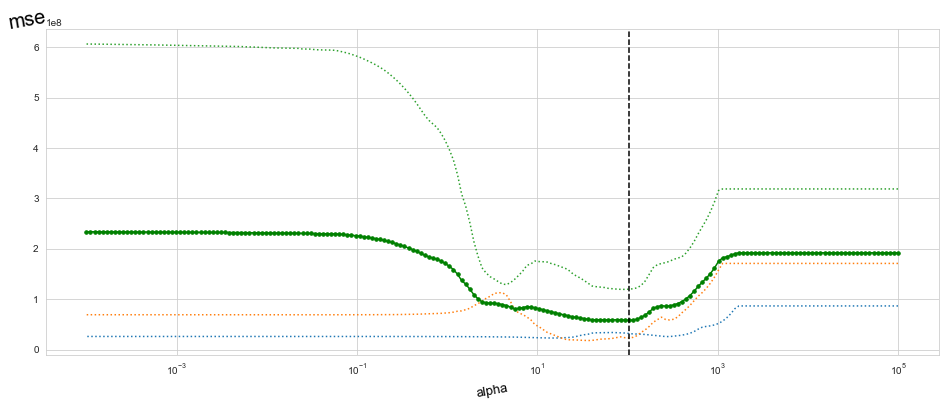

Performance on Training Data
  + RMSE: 4050.25410001
  + R squares: 0.89969625
Performance on Testing Data
  + RMSE: 12312.44262614
  + R squares: 0.73030023



endog=CF--coef shrinkage:


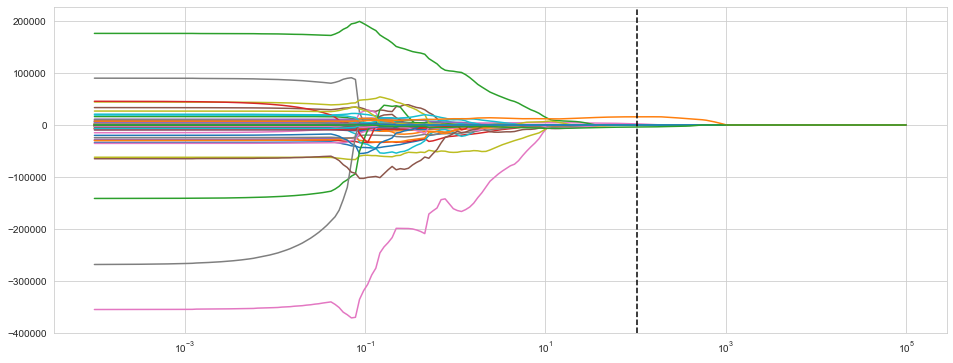

第14 round end 
 選進12個變數
stepwise選出的變數集合S:
 ['Q3', 'd1_CHINAGDP', 'd1_CPI', 'd1_FIA', 'DEP', 'CO(-1)', 'd1_FA', 'd1_PGDP', 'Q4', 'd1_IBF', 'd1_PWM', 'USAGNP(-1)'] 

####################################################################################################
endog= CO ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  325.50885998350566
lasso選進 14 個
lasso選出的變數集合L: Index(['CG', 'GDP', 'J', 'PDT', 'd1_CPIZF', 'd1_FIA', 'd1_IPXUSA', 'd1_J',
       'd1_PSTOCK', 'd1_USAGNP', 'd1_PDT', 'pch_CO', 'pch_MON', 'Q3'],
      dtype='object')


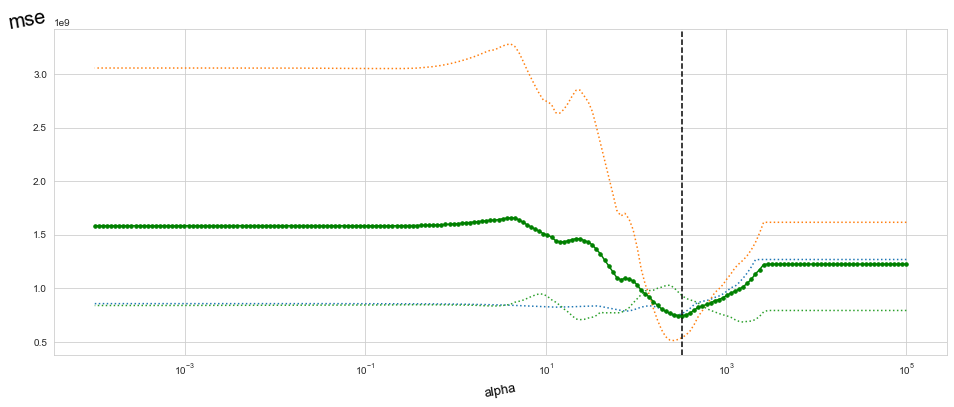

Performance on Training Data
  + RMSE: 18045.61390555
  + R squares: 0.66256129
Performance on Testing Data
  + RMSE: 52208.26601332
  + R squares: 0.67788069



endog=CO--coef shrinkage:


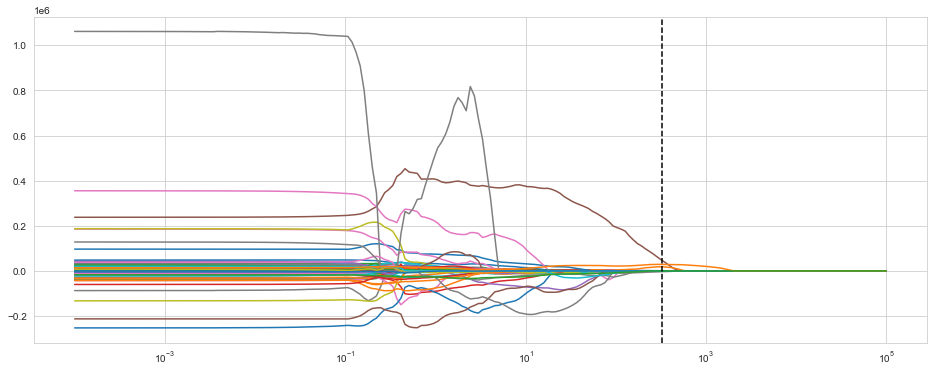

第16 round end 
 選進11個變數
stepwise選出的變數集合S:
 ['Q3', 'GDP', 'd1_USAGNP', 'd1_IPXUSA', 'd1_FIA', 'd1_J', 'd1_CPIZF', 'd1_PDT', 'pch_CO', 'd1_PSTOCK', 'pch_MON'] 

####################################################################################################
endog= IBF ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  674.75440531107
lasso選進 10 個
lasso選出的變數集合L: Index(['GDPMFG', 'LOAN', 'SALES', 'd1_CF', 'd1_CHINAGDP', 'd1_GDPMFG', 'd1_NE',
       'd1_NF', 'd1_TMUIA', 'pch_IBF'],
      dtype='object')


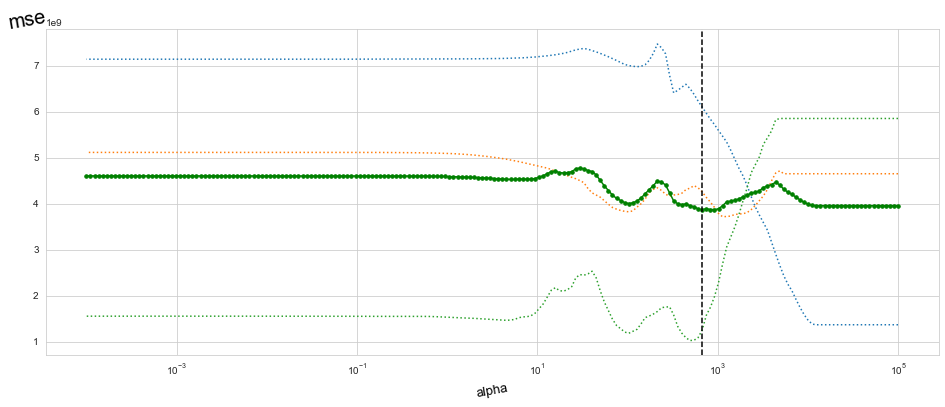

Performance on Training Data
  + RMSE: 32188.44350417
  + R squares: 0.75096637
Performance on Testing Data
  + RMSE: 52164.18965224
  + R squares: 0.50427513



endog=IBF--coef shrinkage:


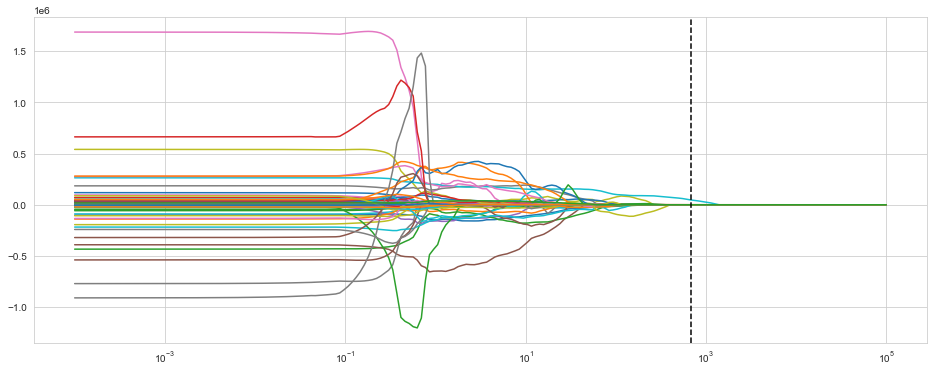

第12 round end 
 選進9個變數
stepwise選出的變數集合S:
 ['d1_CF', 'd1_CHINAGDP', 'LOAN', 'pch_IBF', 'd1_TMUIA', 'd1_GDPMFG', 'GDPMFG', 'd1_NF', 'SALES'] 

####################################################################################################
endog= J ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  674.75440531107
lasso選進 8 個
lasso選出的變數集合L: Index(['d1_CPI', 'd1_LOAN', 'd1_SALES', 'pch_IRC', 'pch_M', 'pch_PWM',
       'pch_ULC', 'Q2'],
      dtype='object')


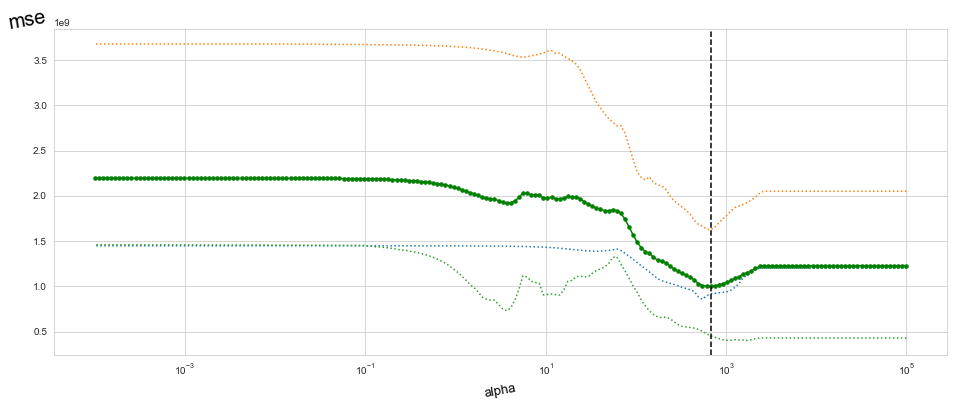

Performance on Training Data
  + RMSE: 25566.59339974
  + R squares: 0.35363223
Performance on Testing Data
  + RMSE: 32116.83979796
  + R squares: 0.12975583



endog=J--coef shrinkage:


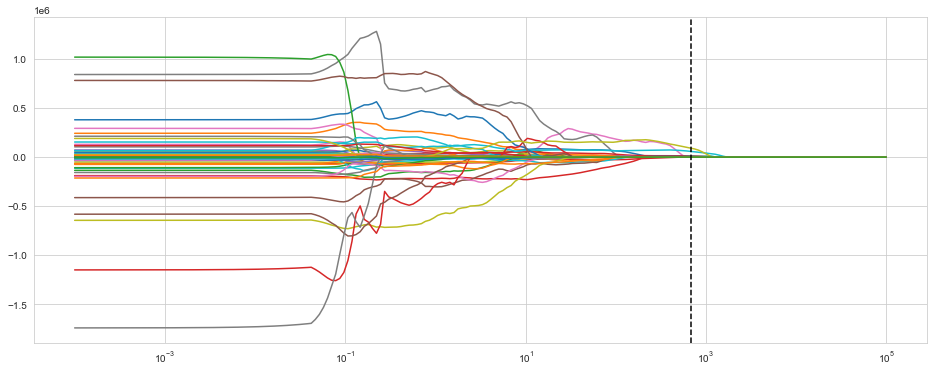

第8 round end 
 選進6個變數
stepwise選出的變數集合S:
 ['pch_M', 'd1_SALES', 'pch_ULC', 'Q2', 'd1_LOAN', 'pch_IRC'] 

####################################################################################################
endog= EX ,cv=TimeSeriesSplit(n_splits=4)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  830.9941949353404
lasso選進 17 個
lasso選出的變數集合L: Index(['J', 'M', 'd1_BONDTRADE', 'd1_CF', 'd1_CHINAGDP', 'd1_DEP', 'd1_EJAP',
       'd1_FA', 'd1_GDP', 'd1_GDPMFG', 'd1_IBF', 'd1_J', 'd1_M', 'd1_PWM',
       'd1_TISUB', 'DEP(-1)', 'pch_GDPMFG'],
      dtype='object')


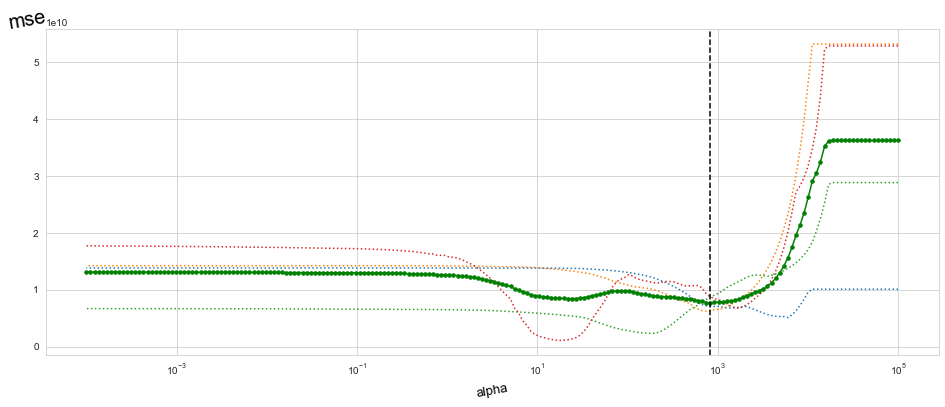

Performance on Training Data
  + RMSE: 41178.37795244
  + R squares: 0.94223183
Performance on Testing Data
  + RMSE: 77203.62748301
  + R squares: 0.91651666



endog=EX--coef shrinkage:


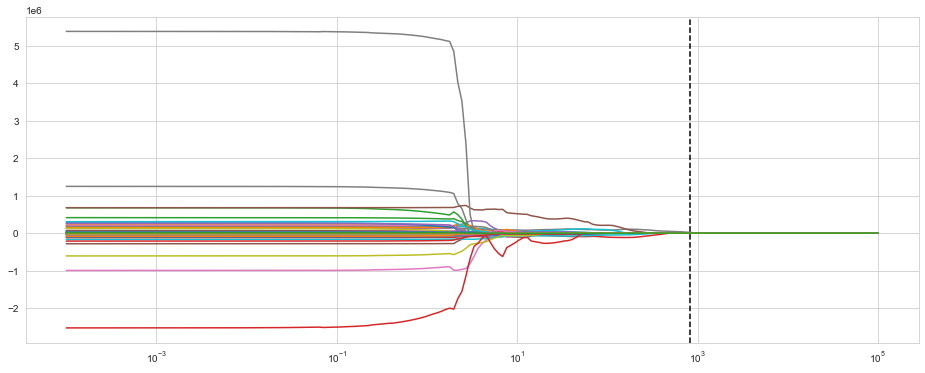

第20 round end 
 選進16個變數
stepwise選出的變數集合S:
 ['d1_M', 'd1_GDP', 'd1_J', 'd1_DEP', 'd1_IBF', 'd1_GDPMFG', 'd1_CF', 'M', 'd1_FA', 'J', 'pch_GDPMFG', 'd1_TISUB', 'd1_EJAP', 'd1_CHINAGDP', 'DEP(-1)', 'd1_BONDTRADE'] 

####################################################################################################
endog= M ,cv=TimeSeriesSplit(n_splits=2)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  1023.4114021054527
lasso選進 14 個
lasso選出的變數集合L: Index(['EX', 'FA', 'POILBRE', 'd1_EX', 'd1_IBF', 'd1_IPXUSA', 'd1_IR', 'd1_J',
       'd1_PGDP', 'd1_TISUB', 'd1_WPI', 'FIA(-1)', 'POILBRE(-1)', 'SALES(-1)'],
      dtype='object')


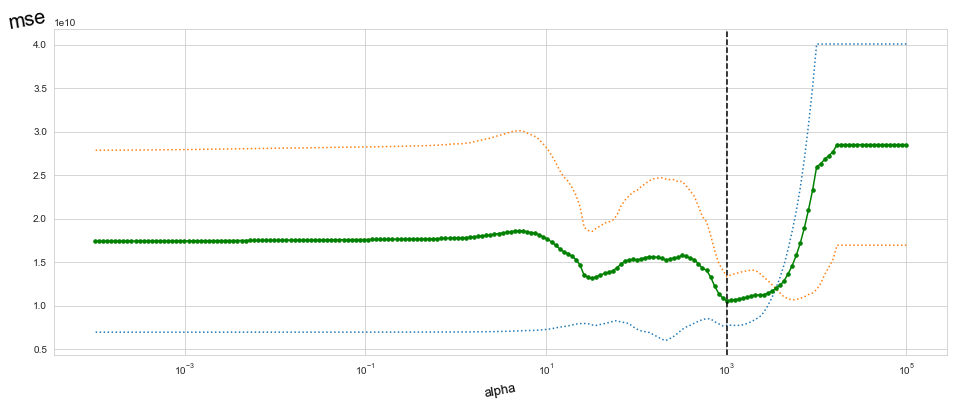

Performance on Training Data
  + RMSE: 42846.48778744
  + R squares: 0.91006483
Performance on Testing Data
  + RMSE: 74898.03434258
  + R squares: 0.80103981



endog=M--coef shrinkage:


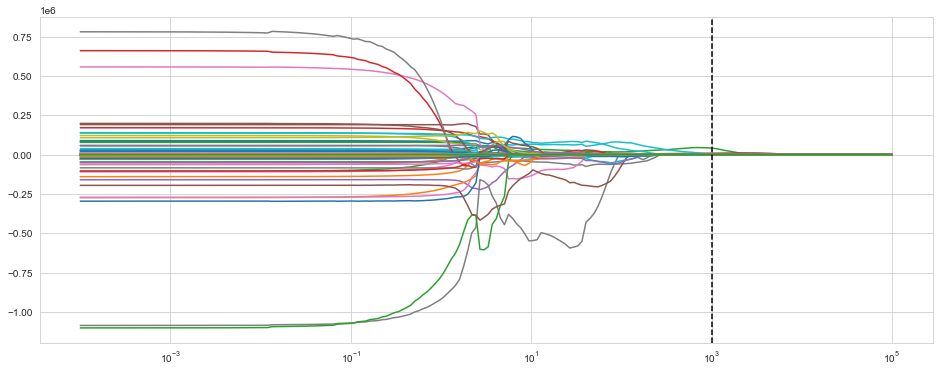

第17 round end 
 選進12個變數
stepwise選出的變數集合S:
 ['d1_EX', 'd1_J', 'd1_IBF', 'SALES(-1)', 'EX', 'POILBRE(-1)', 'd1_IR', 'FA', 'd1_WPI', 'd1_IPXUSA', 'POILBRE', 'd1_PGDP'] 

####################################################################################################
endog= NU ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.007149428986597577
lasso選進 5 個
lasso選出的變數集合L: Index(['d1_IR', 'd1_NE', 'pch_NU', 'pch_TISUB', 'Q3'], dtype='object')


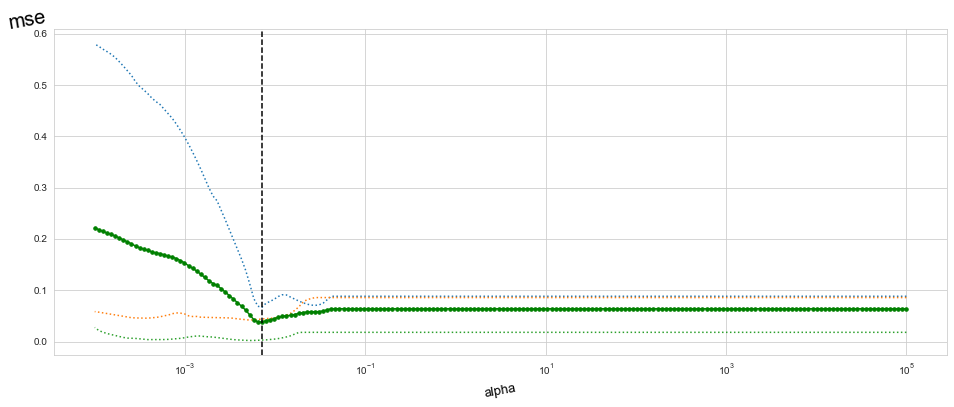

Performance on Training Data
  + RMSE: 0.15870716
  + R squares: 0.60048031
Performance on Testing Data
  + RMSE: 0.15786111
  + R squares: -0.02908144



endog=NU--coef shrinkage:


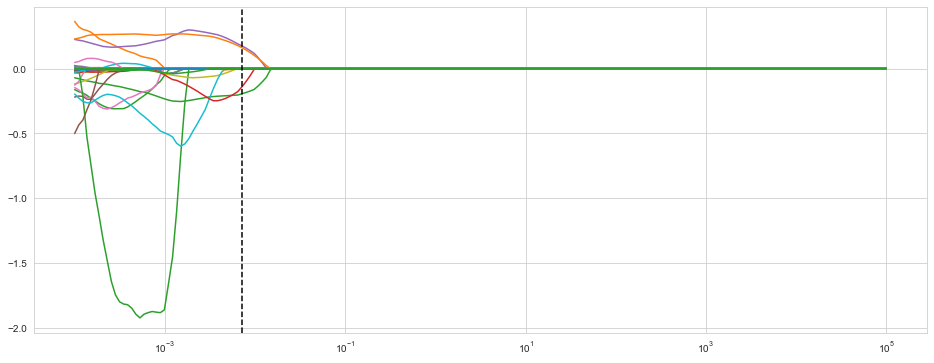

第5 round end 
 選進所有變數(5個)
stepwise選出的變數集合S:
 ['d1_IR', 'Q3', 'd1_NE', 'pch_NU', 'pch_TISUB'] 

####################################################################################################
endog= PSTOCK ,cv=TimeSeriesSplit(n_splits=4)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  9.437878277775392
lasso選進 11 個
lasso選出的變數集合L: Index(['STOCKTRADE', 'TISUB', 'd1_EROC', 'd1_POILBRE', 'd1_SALES',
       'd1_STOCKTRADE', 'ADRESERVE(-1)', 'FA(-1)', 'pch_ADBNF', 'pch_PSTOCK',
       'pch_WPI'],
      dtype='object')


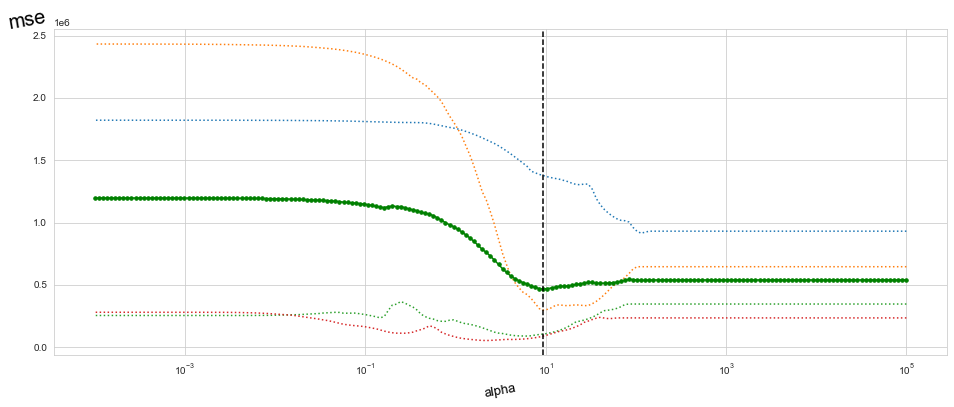

Performance on Training Data
  + RMSE: 378.10358187
  + R squares: 0.73764692
Performance on Testing Data
  + RMSE: 839.68114836
  + R squares: 0.28040548



endog=PSTOCK--coef shrinkage:


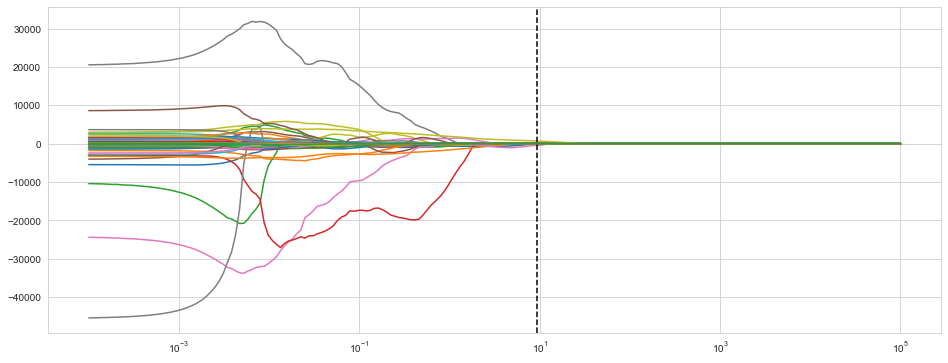

第9 round end 
 選進7個變數
stepwise選出的變數集合S:
 ['STOCKTRADE', 'pch_PSTOCK', 'd1_EROC', 'pch_ADBNF', 'd1_POILBRE', 'TISUB', 'FA(-1)'] 

####################################################################################################
endog= SALES ,cv=TimeSeriesSplit(n_splits=4)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  1023.4114021054527
lasso選進 10 個
lasso選出的變數集合L: Index(['CG', 'd1_IPXUSA', 'd1_IR', 'd1_MON', 'd1_POILBRE', 'd1_PSTOCK',
       'd1_PWM', 'd1_USAGNP', 'pch_MON', 'pch_SALES'],
      dtype='object')


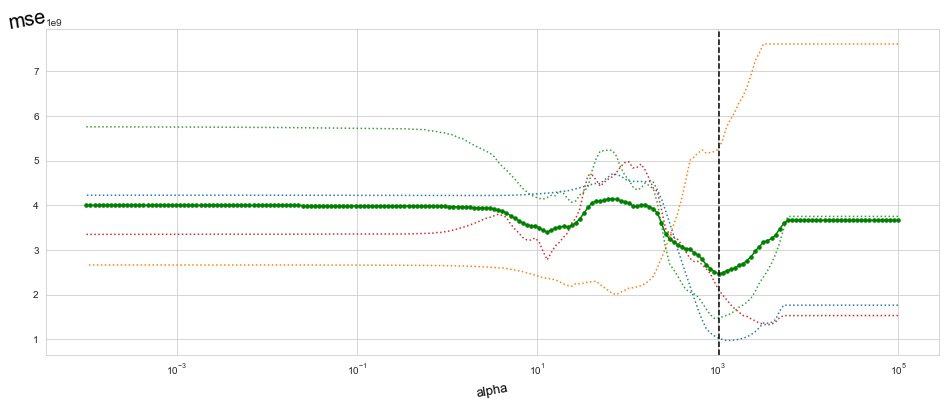

Performance on Training Data
  + RMSE: 33221.23240032
  + R squares: 0.64510140
Performance on Testing Data
  + RMSE: 46884.50730930
  + R squares: 0.36674569



endog=SALES--coef shrinkage:


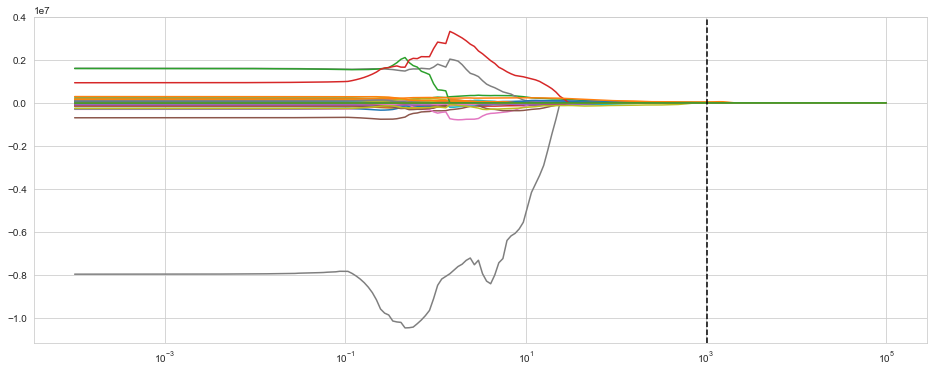

第8 round end 
 選進6個變數
stepwise選出的變數集合S:
 ['d1_POILBRE', 'd1_MON', 'd1_PWM', 'd1_IR', 'CG', 'pch_SALES'] 

####################################################################################################
endog= FA ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  55.42664520663107
lasso選進 12 個
lasso選出的變數集合L: Index(['CHINAGDP', 'FIA', 'd1_AFR', 'd1_CHINAGDP', 'd1_FIA', 'd1_GDP',
       'pch_CF', 'pch_FFR', 'pch_J', 'pch_JAPGDP', 'pch_ULC', 'Q1'],
      dtype='object')


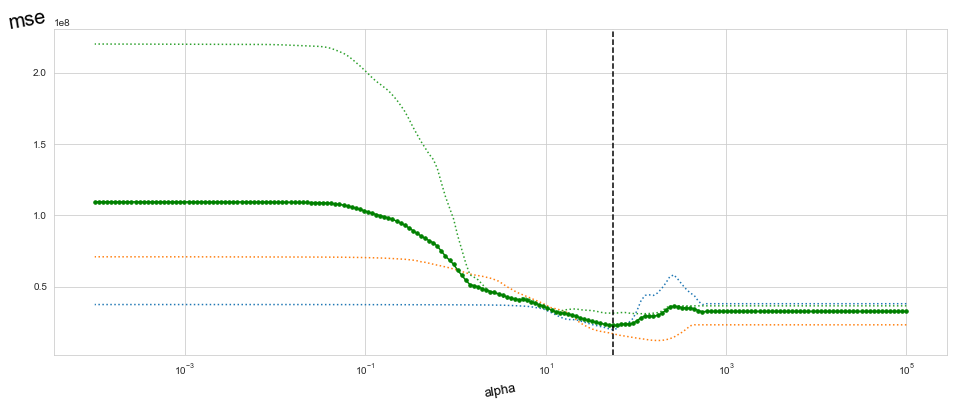

Performance on Training Data
  + RMSE: 3077.93340545
  + R squares: 0.67186233
Performance on Testing Data
  + RMSE: 4848.28443575
  + R squares: 0.32481166



endog=FA--coef shrinkage:


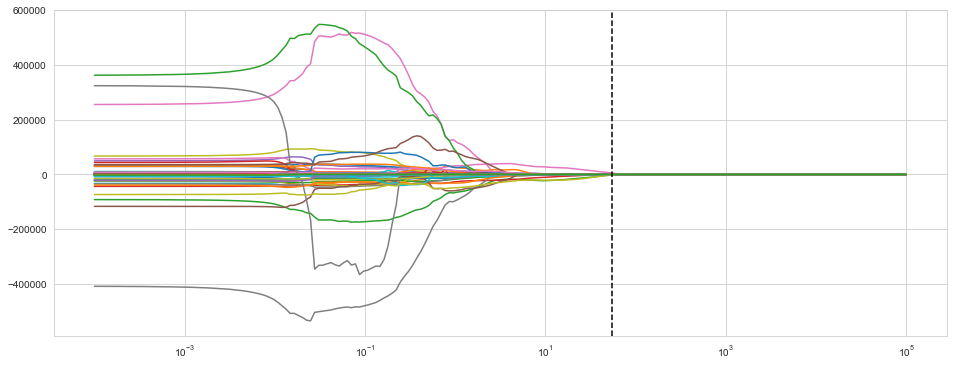

第10 round end 
 選進7個變數
stepwise選出的變數集合S:
 ['CHINAGDP', 'd1_AFR', 'Q1', 'FIA', 'pch_ULC', 'pch_JAPGDP', 'pch_CF'] 

####################################################################################################
endog= LOAN ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  3217.641750250735
lasso選進 9 個
lasso選出的變數集合L: Index(['GDPMFG', 'd1_ADBNF', 'd1_JAPGDP', 'd1_MON', 'd1_NE', 'd1_RMIBON',
       'pch_LOAN', 'pch_NU', 'pch_PSTOCK'],
      dtype='object')


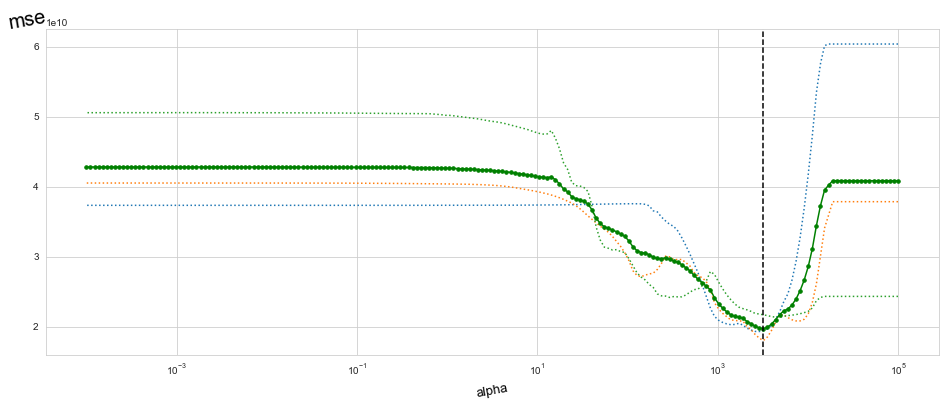

Performance on Training Data
  + RMSE: 121653.65754501
  + R squares: 0.57036241
Performance on Testing Data
  + RMSE: 194043.06594198
  + R squares: -0.45825179



endog=LOAN--coef shrinkage:


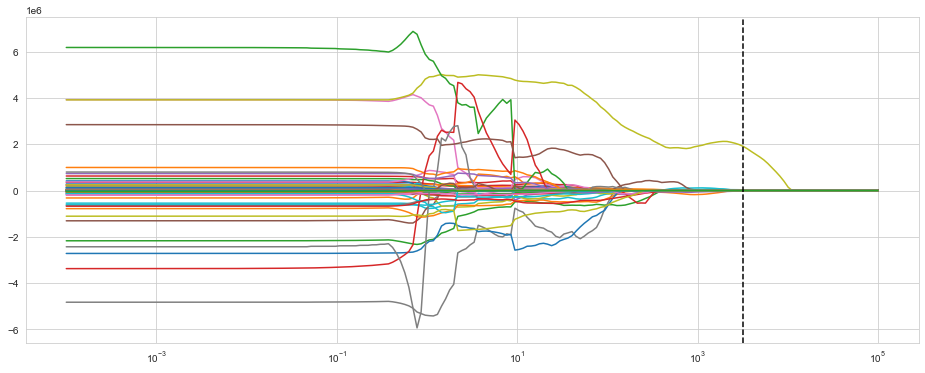

第10 round end 
 選進8個變數
stepwise選出的變數集合S:
 ['pch_LOAN', 'GDPMFG', 'd1_ADBNF', 'd1_MON', 'd1_NE', 'd1_RMIBON', 'pch_NU', 'd1_JAPGDP'] 

####################################################################################################
endog= CPI ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.010843659686896108
lasso選進 9 個
lasso選出的變數集合L: Index(['CPIZF', 'GOVSUB', 'NE', 'd1_CF', 'd1_M', 'd1_M2', 'pch_CPI', 'pch_J',
       'Q1'],
      dtype='object')


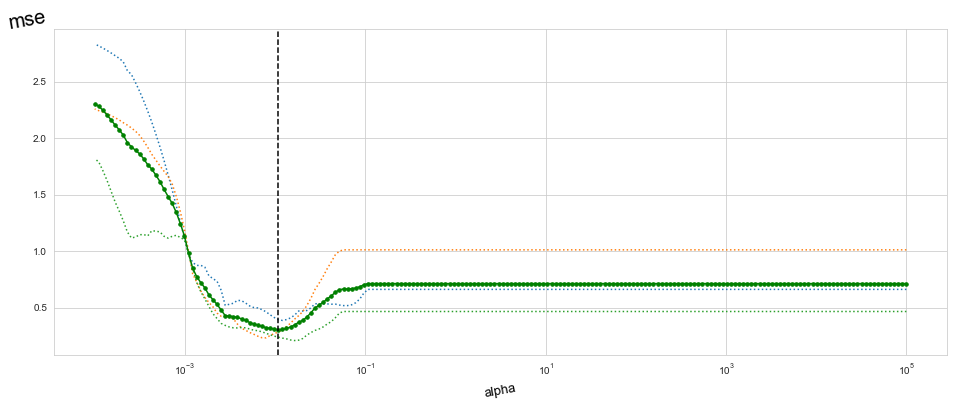

Performance on Training Data
  + RMSE: 0.46020053
  + R squares: 0.66200717
Performance on Testing Data
  + RMSE: 0.39776407
  + R squares: 0.42229049



endog=CPI--coef shrinkage:


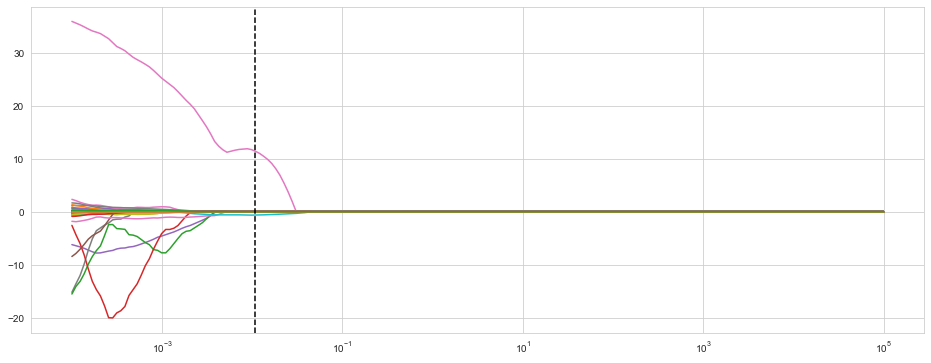

第10 round end 
 選進所有變數(9個)
stepwise選出的變數集合S:
 ['Q1', 'pch_CPI', 'NE', 'd1_CF', 'CPIZF', 'pch_J', 'd1_M2', 'GOVSUB', 'd1_M'] 

####################################################################################################
endog= PWM ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  32.92971255097155
lasso選進 10 個
lasso選出的變數集合L: Index(['CG', 'PSTOCK', 'PDT', 'd1_CHINAGDP', 'd1_DEP', 'd1_PGDP', 'd1_SALES',
       'd1_ULC', 'NE(-1)', 'TISUB(-1)'],
      dtype='object')


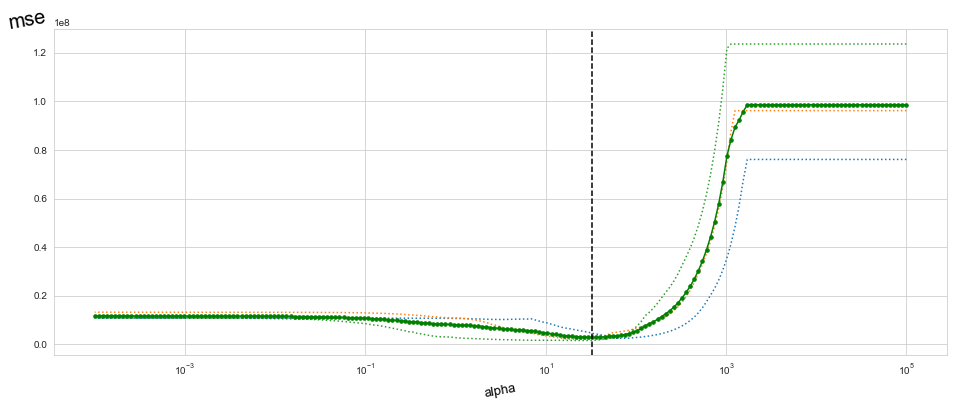

Performance on Training Data
  + RMSE: 990.57579830
  + R squares: 0.98922819
Performance on Testing Data
  + RMSE: 1914.12866874
  + R squares: 0.97662104



endog=PWM--coef shrinkage:


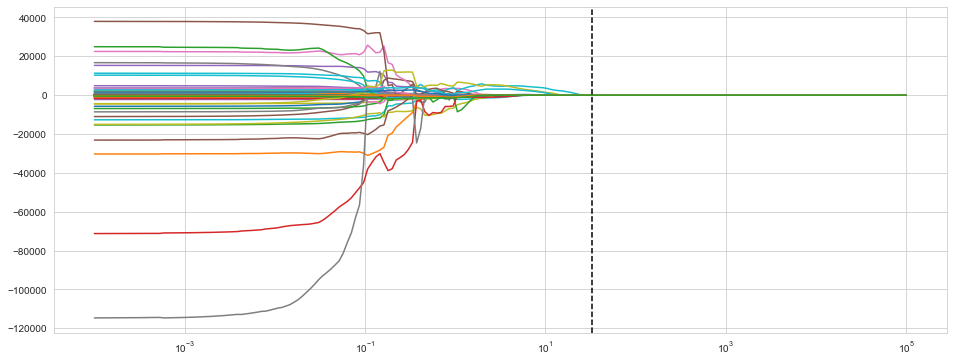

第12 round end 
 選進8個變數
stepwise選出的變數集合S:
 ['d1_ULC', 'd1_CHINAGDP', 'NE(-1)', 'd1_DEP', 'PDT', 'd1_SALES', 'TISUB(-1)', 'd1_PGDP'] 

####################################################################################################
endog= WPI ,cv=TimeSeriesSplit(n_splits=4)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.03409285069746815
lasso選進 9 個
lasso選出的變數集合L: Index(['d1_CF', 'd1_DEP', 'd1_EROC', 'd1_IPXUSA', 'd1_IRC', 'd1_M',
       'd1_RMIBON', 'd1_TMUIA', 'pch_WPI'],
      dtype='object')


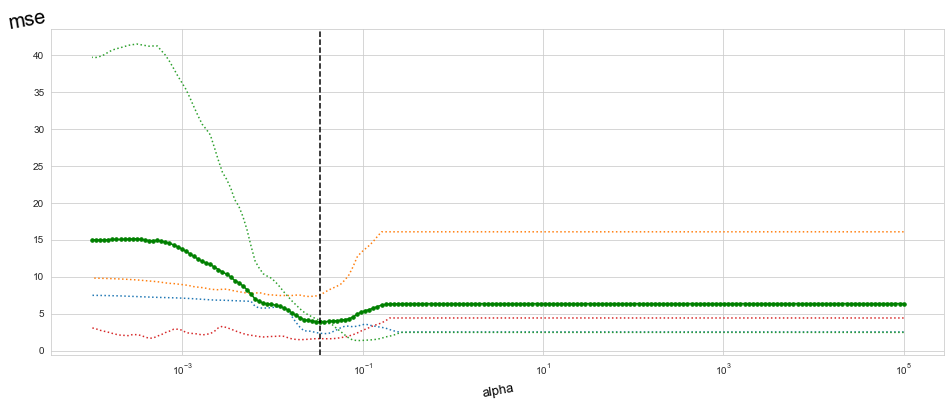

Performance on Training Data
  + RMSE: 1.28938518
  + R squares: 0.70062453
Performance on Testing Data
  + RMSE: 2.17692024
  + R squares: 0.43853141



endog=WPI--coef shrinkage:


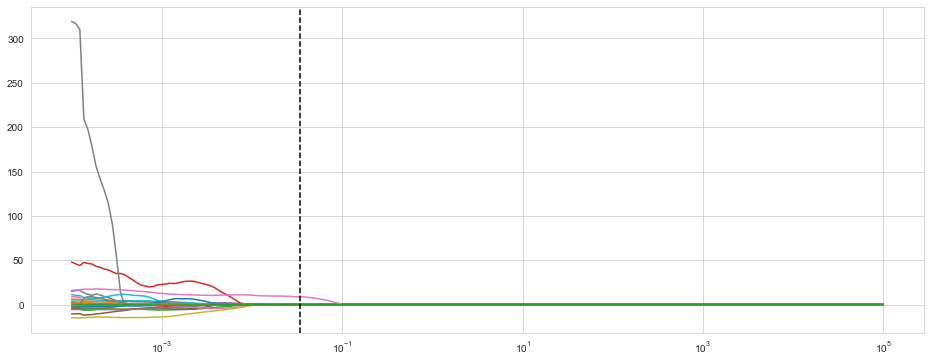

第8 round end 
 選進7個變數
stepwise選出的變數集合S:
 ['d1_M', 'd1_DEP', 'd1_TMUIA', 'd1_EROC', 'pch_WPI', 'd1_RMIBON', 'd1_CF'] 

####################################################################################################
endog= MON ,cv=TimeSeriesSplit(n_splits=4)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  3962.6886387014783
lasso選進 10 個
lasso選出的變數集合L: Index(['d1_DEPOSIT', 'd1_GDP', 'd1_M2', 'd1_PSTOCK', 'd1_STOCKTRADE',
       'pch_CPIZF', 'pch_IRC', 'pch_IRI', 'pch_MON', 'Q4'],
      dtype='object')


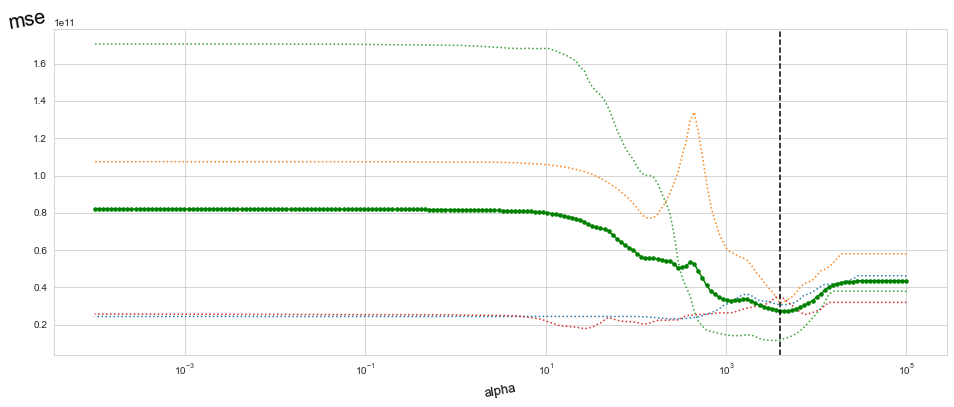

Performance on Training Data
  + RMSE: 127610.27245709
  + R squares: 0.58214925
Performance on Testing Data
  + RMSE: 288992.55510398
  + R squares: 0.20797739



endog=MON--coef shrinkage:


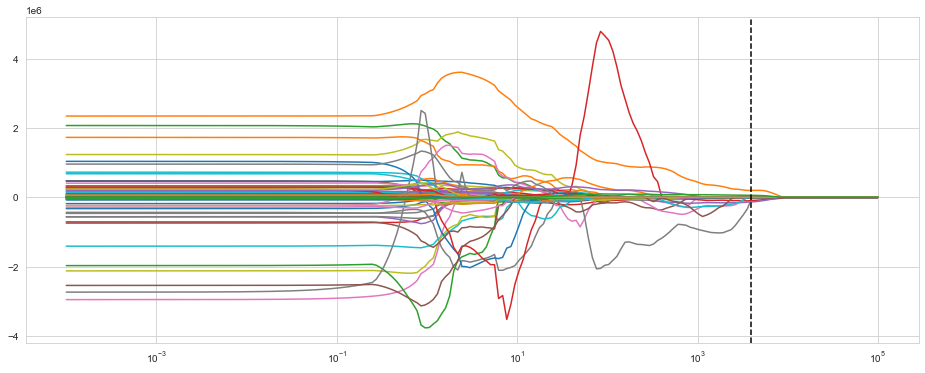

第11 round end 
 選進8個變數
stepwise選出的變數集合S:
 ['d1_PSTOCK', 'd1_GDP', 'pch_CPIZF', 'd1_M2', 'pch_IRC', 'd1_STOCKTRADE', 'Q4', 'pch_IRI'] 

####################################################################################################
endog= TISUB ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  608.0224261649427
lasso選進 4 個
lasso選出的變數集合L: Index(['PSTOCK', 'd1_DEP', 'PWM(-1)', 'Q2'], dtype='object')


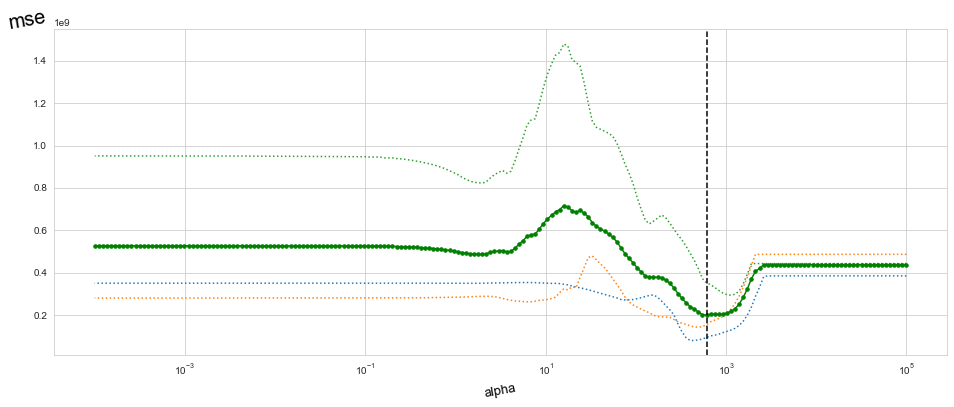

Performance on Training Data
  + RMSE: 13468.65689066
  + R squares: 0.55626797
Performance on Testing Data
  + RMSE: 21752.41446678
  + R squares: 0.23734626



endog=TISUB--coef shrinkage:


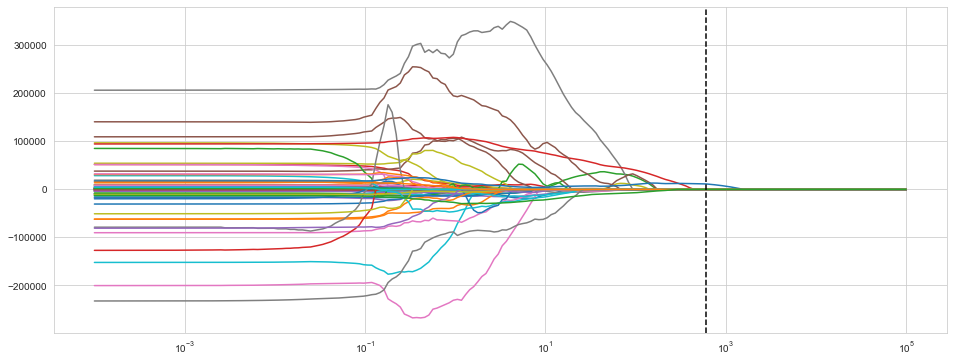

第4 round end 
 選進所有變數(4個)
stepwise選出的變數集合S:
 ['PWM(-1)', 'd1_DEP', 'PSTOCK', 'Q2'] 

####################################################################################################
endog= EROC ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.0419870708444391
lasso選進 4 個
lasso選出的變數集合L: Index(['d1_AFR', 'd1_EJAP', 'd1_PSTOCK', 'pch_EROC'], dtype='object')


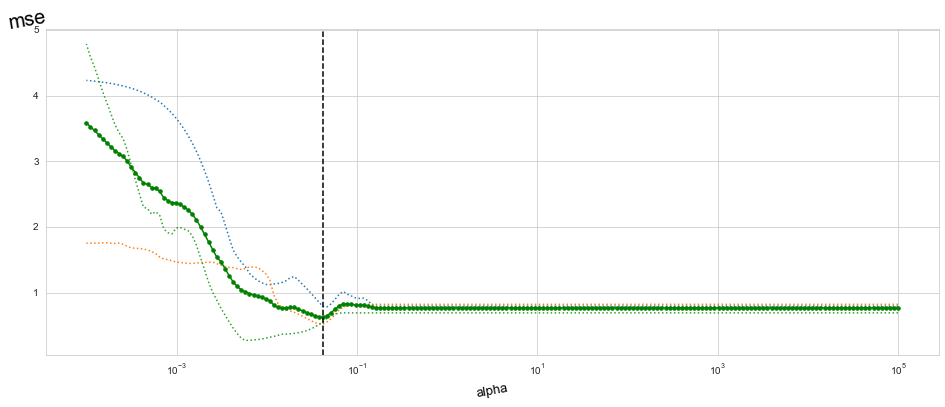

Performance on Training Data
  + RMSE: 0.85964859
  + R squares: 0.14805895
Performance on Testing Data
  + RMSE: 0.40041905
  + R squares: 0.04993879



endog=EROC--coef shrinkage:


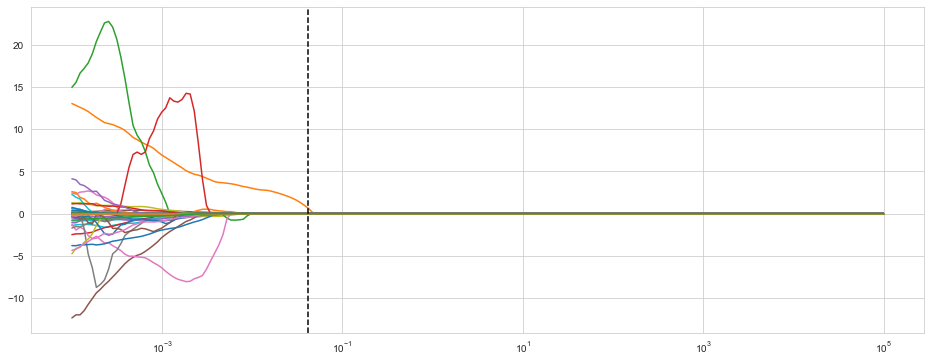

第6 round end 
 選進所有變數(4個)
stepwise選出的變數集合S:
 ['d1_PSTOCK', 'd1_EJAP', 'pch_EROC', 'd1_AFR'] 

####################################################################################################
endog= AFR ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  127.50512407130128
lasso選進 6 個
lasso選出的變數集合L: Index(['FA', 'd1_EROC', 'd1_FA', 'pch_AFR', 'pch_IR', 'pch_IRI'], dtype='object')


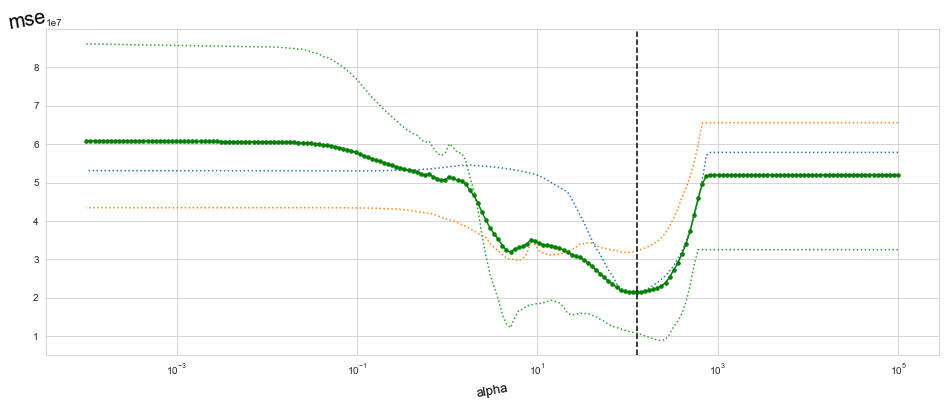

Performance on Training Data
  + RMSE: 3694.31568652
  + R squares: 0.64960821
Performance on Testing Data
  + RMSE: 7457.18173966
  + R squares: 0.26730910



endog=AFR--coef shrinkage:


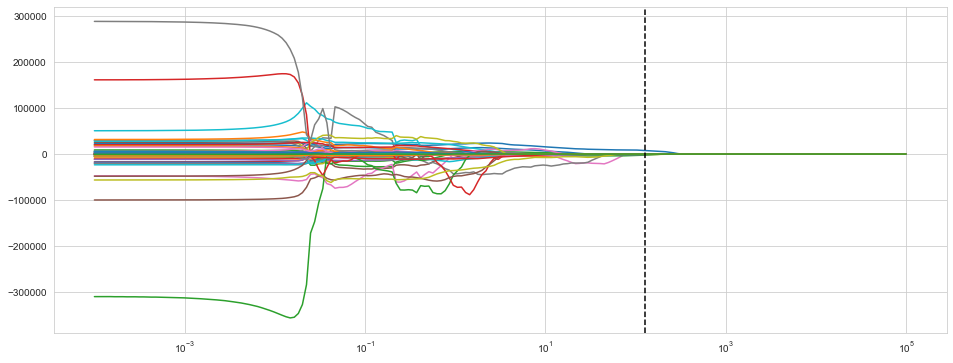

第6 round end 
 選進5個變數
stepwise選出的變數集合S:
 ['FA', 'd1_EROC', 'pch_IR', 'pch_AFR', 'd1_FA'] 

####################################################################################################
endog= TMUIA ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.05738441648302398
lasso選進 9 個
lasso選出的變數集合L: Index(['SALES', 'd1_AFR', 'd1_EJAP', 'd1_EROC', 'd1_IPXUSA', 'd1_POILBRE',
       'd1_WPI', 'pch_EJAP', 'pch_EROC'],
      dtype='object')


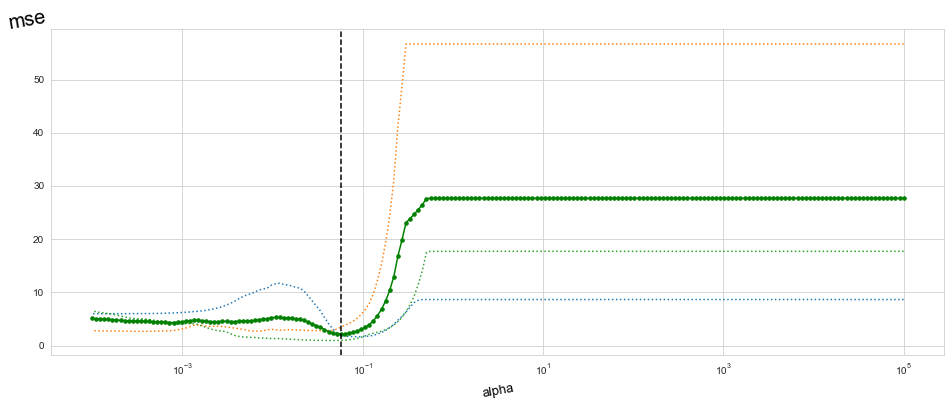

Performance on Training Data
  + RMSE: 1.39513874
  + R squares: 0.91288026
Performance on Testing Data
  + RMSE: 1.01258476
  + R squares: 0.89964985



endog=TMUIA--coef shrinkage:


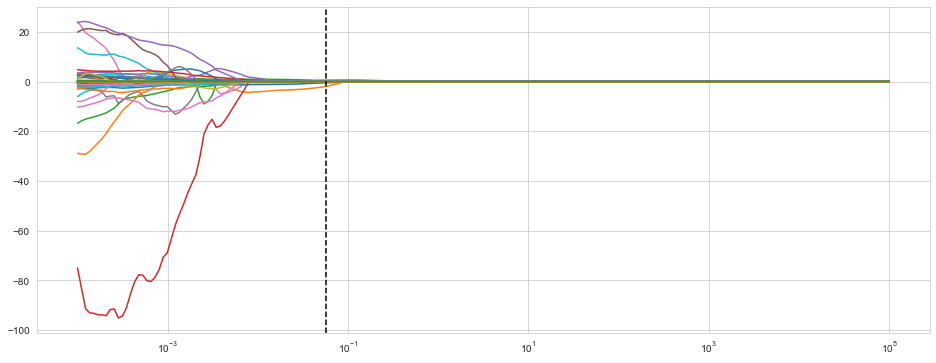

第10 round end 
 選進8個變數
stepwise選出的變數集合S:
 ['d1_POILBRE', 'd1_IPXUSA', 'd1_WPI', 'd1_EROC', 'd1_EJAP', 'SALES', 'pch_EROC', 'd1_AFR'] 

####################################################################################################
endog= DEP ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  75.7525025877192
lasso選進 22 個
lasso選出的變數集合L: Index(['CF', 'GDP', 'd1_ADRESERVE', 'd1_CF', 'd1_CHINAGDP', 'd1_EJAP',
       'd1_IBF', 'd1_LOAN', 'd1_MON', 'd1_PGDP', 'd1_PWM', 'd1_TISUB',
       'd1_WPI', 'EX(-1)', 'FIA(-1)', 'USAGNP(-1)', 'pch_ADBNF', 'pch_DEP',
       'pch_EJAP', 'pch_IG', 'pch_WPI', 'Q2'],
      dtype='object')


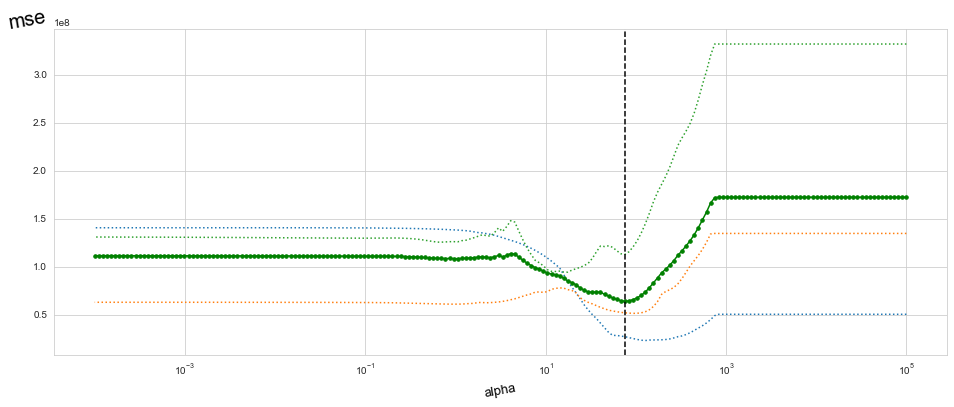

Performance on Training Data
  + RMSE: 4389.72425263
  + R squares: 0.85559491
Performance on Testing Data
  + RMSE: 9411.50859989
  + R squares: 0.86147915



endog=DEP--coef shrinkage:


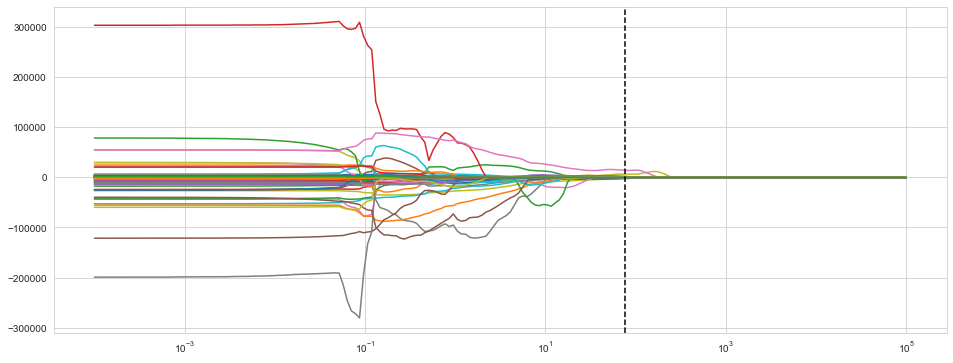

第16 round end 
 選進13個變數
stepwise選出的變數集合S:
 ['d1_TISUB', 'd1_CHINAGDP', 'EX(-1)', 'd1_WPI', 'd1_MON', 'd1_EJAP', 'USAGNP(-1)', 'd1_PGDP', 'pch_ADBNF', 'FIA(-1)', 'd1_CF', 'pch_WPI', 'pch_EJAP'] 

####################################################################################################
endog= NF ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.27364399970746717
lasso選進 8 個
lasso選出的變數集合L: Index(['CG', 'd1_IR', 'd1_NE', 'd1_NU', 'd1_PSTOCK', 'd1_SALES', 'd1_ULC',
       'pch_TISUB'],
      dtype='object')


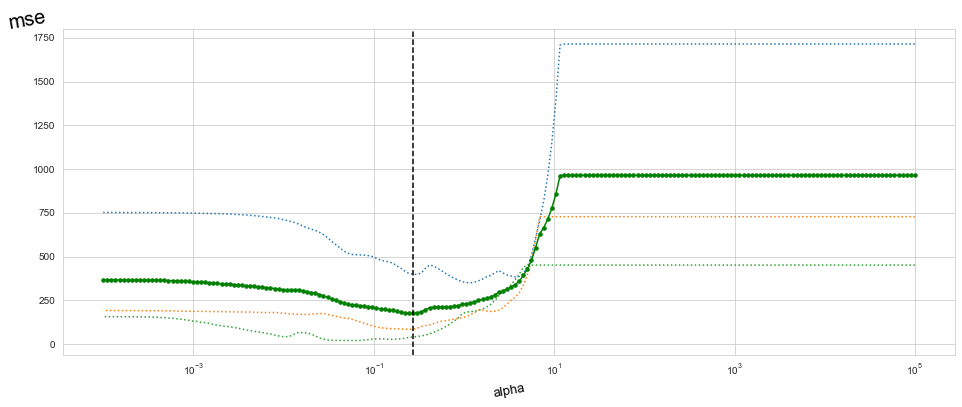

Performance on Training Data
  + RMSE: 9.16278126
  + R squares: 0.94793207
Performance on Testing Data
  + RMSE: 9.08794111
  + R squares: 0.47595299



endog=NF--coef shrinkage:


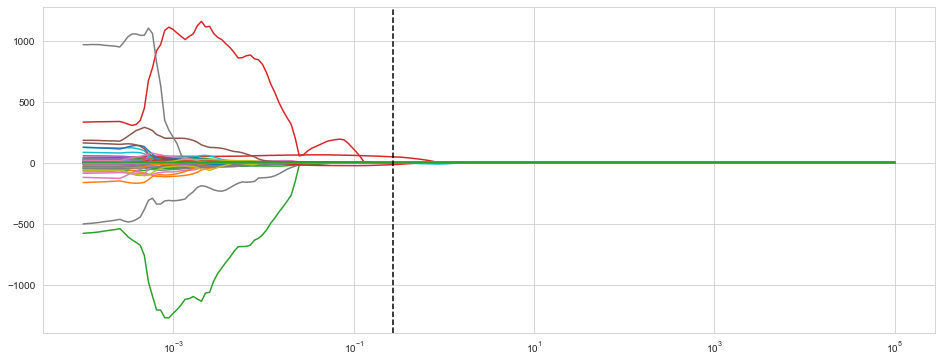

第8 round end 
 選進所有變數(8個)
stepwise選出的變數集合S:
 ['d1_NE', 'd1_NU', 'd1_SALES', 'pch_TISUB', 'CG', 'd1_PSTOCK', 'd1_ULC', 'd1_IR'] 

####################################################################################################
endog= BONDTRADE ,cv=TimeSeriesSplit(n_splits=2)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  43470.13158125035
lasso選進 6 個
lasso選出的變數集合L: Index(['d1_ADRESERVE', 'd1_PDT', 'd1_ULC', 'KGDEBT(-1)', 'pch_AFR',
       'pch_BONDTRADE'],
      dtype='object')


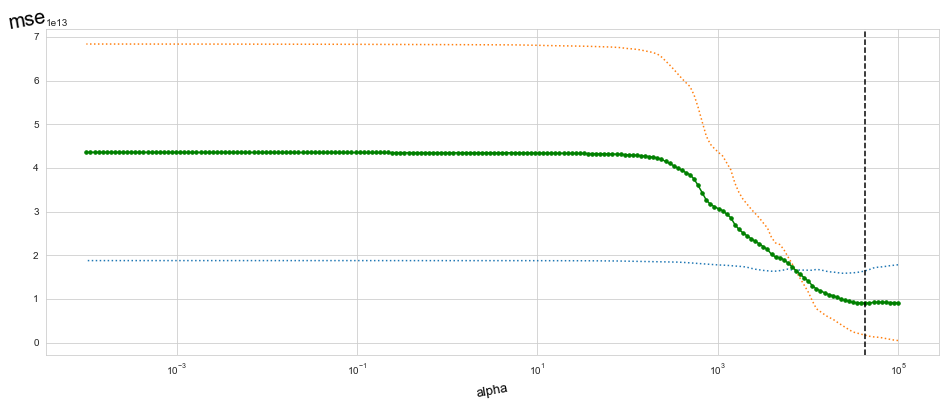

Performance on Training Data
  + RMSE: 2118815.62459557
  + R squares: 0.32112671
Performance on Testing Data
  + RMSE: 918578.45953362
  + R squares: 0.17277815



endog=BONDTRADE--coef shrinkage:


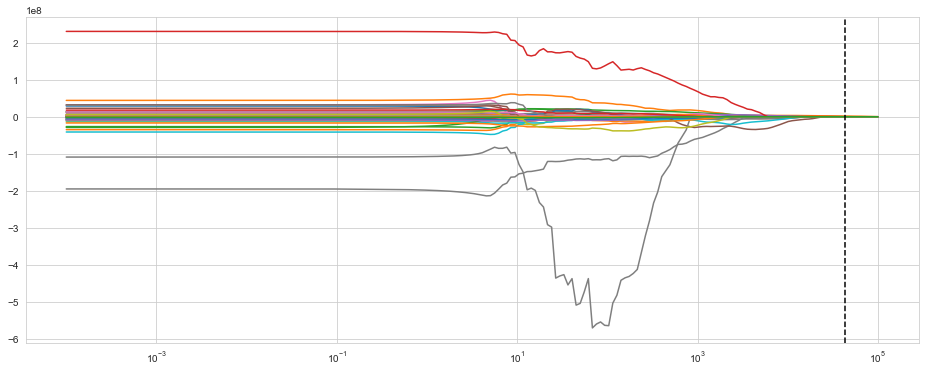

第6 round end 
 選進所有變數(6個)
stepwise選出的變數集合S:
 ['pch_BONDTRADE', 'd1_ADRESERVE', 'd1_ULC', 'pch_AFR', 'd1_PDT', 'KGDEBT(-1)'] 

####################################################################################################
endog= GDPMFG ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  3962.6886387014783
lasso選進 3 個
lasso選出的變數集合L: Index(['d1_GDP', 'M2(-1)', 'Q1'], dtype='object')


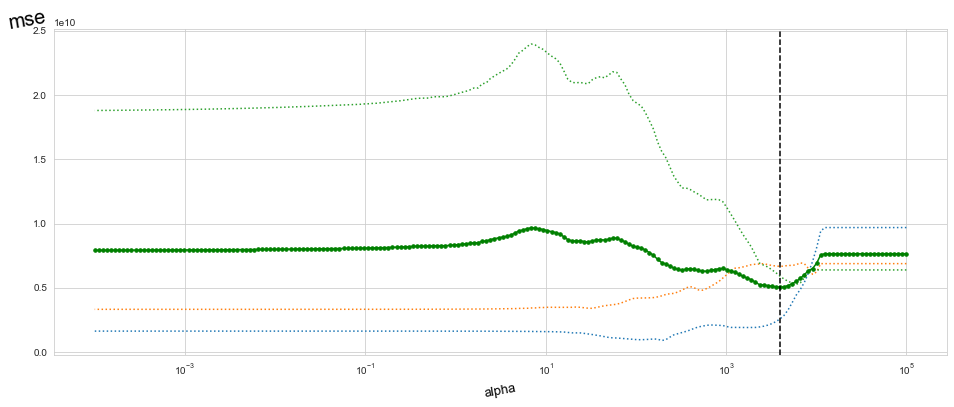

Performance on Training Data
  + RMSE: 65617.59348829
  + R squares: 0.34992250
Performance on Testing Data
  + RMSE: 97526.95921368
  + R squares: 0.38039412



endog=GDPMFG--coef shrinkage:


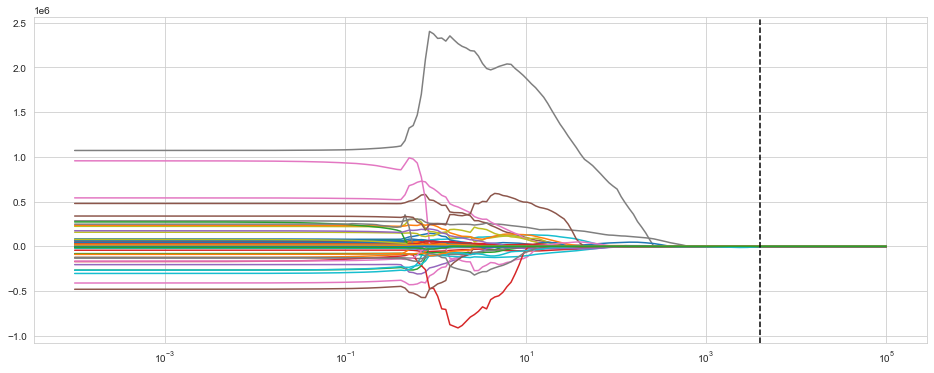

第3 round end 
 選進所有變數(3個)
stepwise選出的變數集合S:
 ['d1_GDP', 'M2(-1)', 'Q1'] 

####################################################################################################
endog= CPIZF ,cv=TimeSeriesSplit(n_splits=2)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.009771241535346501
lasso選進 7 個
lasso選出的變數集合L: Index(['d1_CPI', 'd1_NU', 'd1_ULC', 'ULC(-1)', 'pch_CPIZF', 'Q2', 'Q3'], dtype='object')


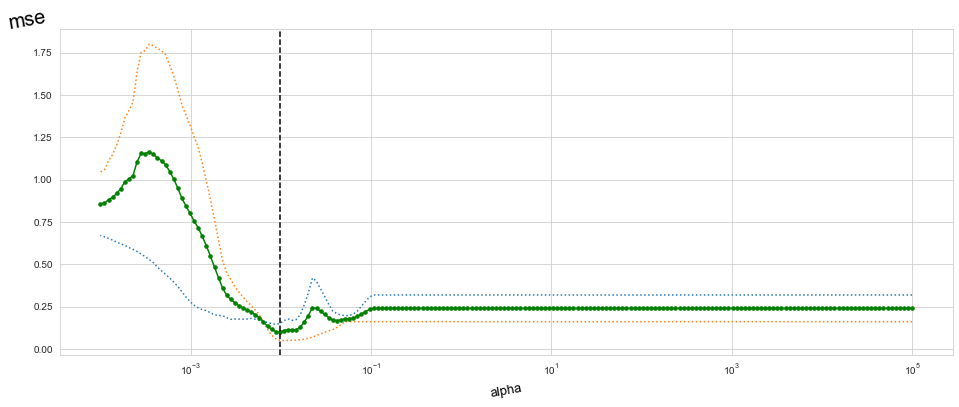

Performance on Training Data
  + RMSE: 0.32316796
  + R squares: 0.67878162
Performance on Testing Data
  + RMSE: 0.14790293
  + R squares: 0.78479939



endog=CPIZF--coef shrinkage:


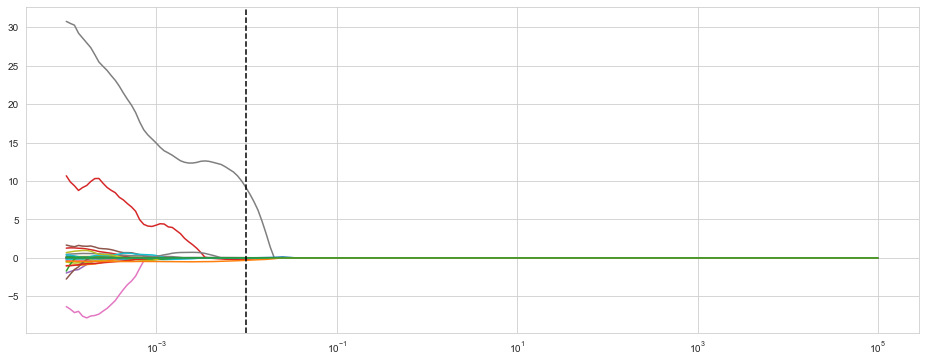

第6 round end 
 選進5個變數
stepwise選出的變數集合S:
 ['d1_ULC', 'Q3', 'pch_CPIZF', 'd1_CPI', 'd1_NU'] 

####################################################################################################
endog= PGDP ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.07842822061337681
lasso選進 2 個
lasso選出的變數集合L: Index(['d1_M', 'd1_PWM'], dtype='object')


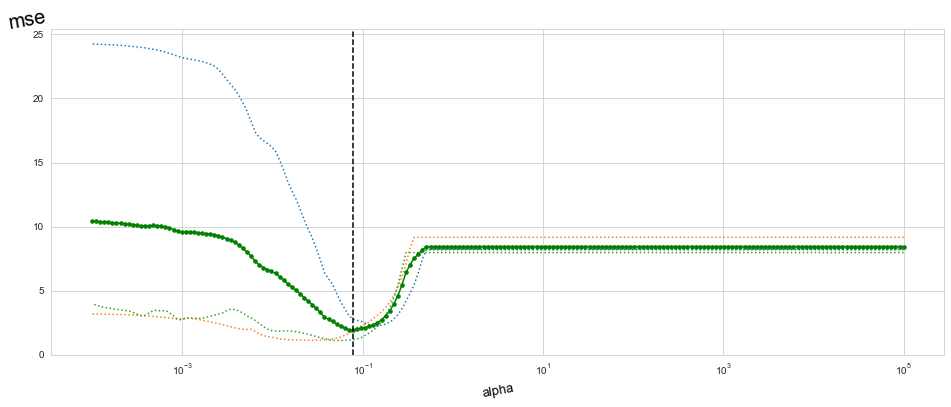

Performance on Training Data
  + RMSE: 1.46404953
  + R squares: 0.73435380
Performance on Testing Data
  + RMSE: 0.87389972
  + R squares: 0.80234679



endog=PGDP--coef shrinkage:


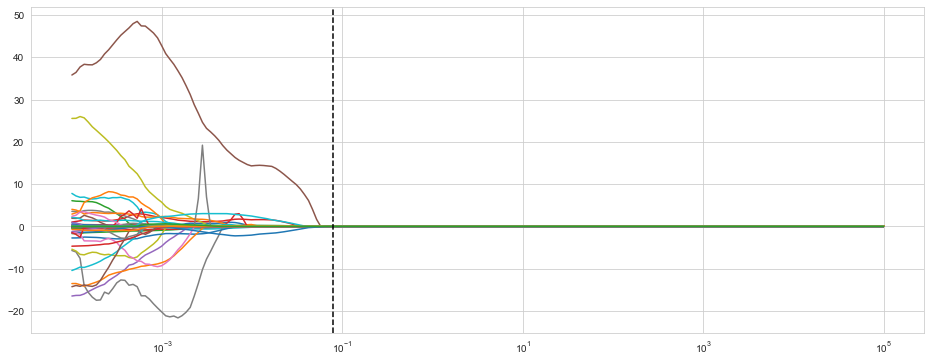

stepwise選出的變數集合S:
 ['d1_PWM', 'd1_M'] 

####################################################################################################
endog= M2 ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  19.56398343517065
lasso選進 8 個
lasso選出的變數集合L: Index(['d1_ADRESERVE', 'd1_CHINAGDP', 'd1_CPI', 'd1_DEPOSIT', 'd1_PWM',
       'd1_WPI', 'pch_M2', 'Q1'],
      dtype='object')


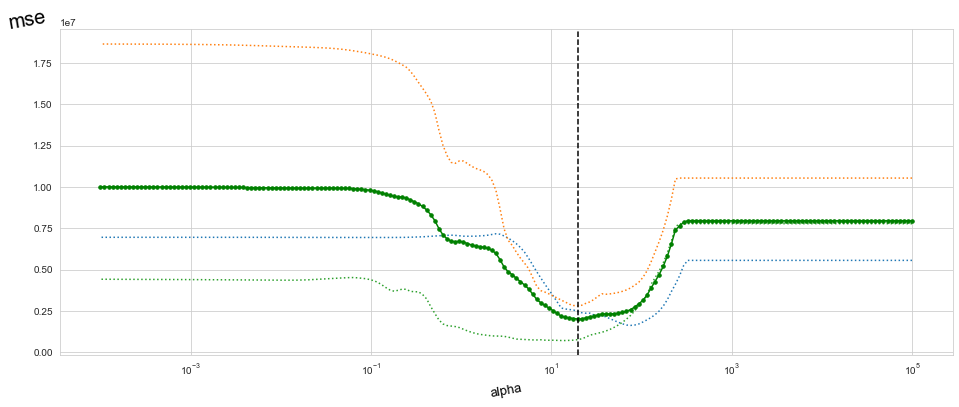

Performance on Training Data
  + RMSE: 777.39631193
  + R squares: 0.90731325
Performance on Testing Data
  + RMSE: 894.99743559
  + R squares: 0.96217352



endog=M2--coef shrinkage:


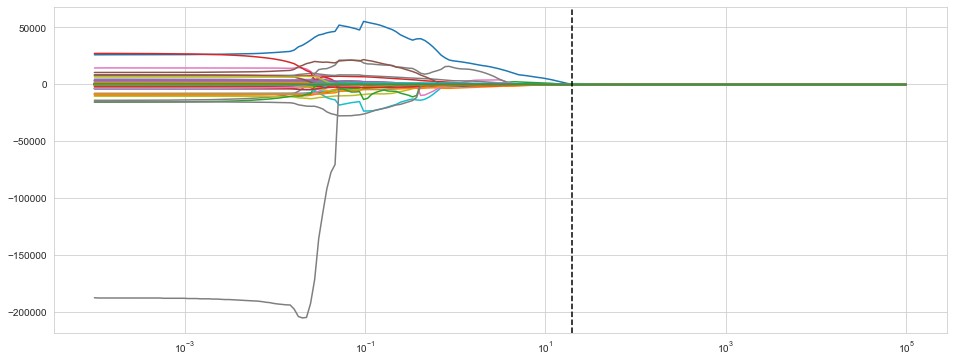

第8 round end 
 選進7個變數
stepwise選出的變數集合S:
 ['d1_DEPOSIT', 'd1_PWM', 'Q1', 'd1_CPI', 'd1_ADRESERVE', 'pch_M2', 'd1_WPI'] 

####################################################################################################
endog= DEPOSIT ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  1722.5859653987875
lasso選進 14 個
lasso選出的變數集合L: Index(['IG', 'STOCKTRADE', 'd1_EROC', 'd1_IBF', 'd1_M2', 'd1_PWM',
       'd1_STOCKTRADE', 'd1_TMUIA', 'd1_ULC', 'pch_DEPOSIT', 'pch_EROC',
       'pch_STOCKTRADE', 'Q1', 'Q4'],
      dtype='object')


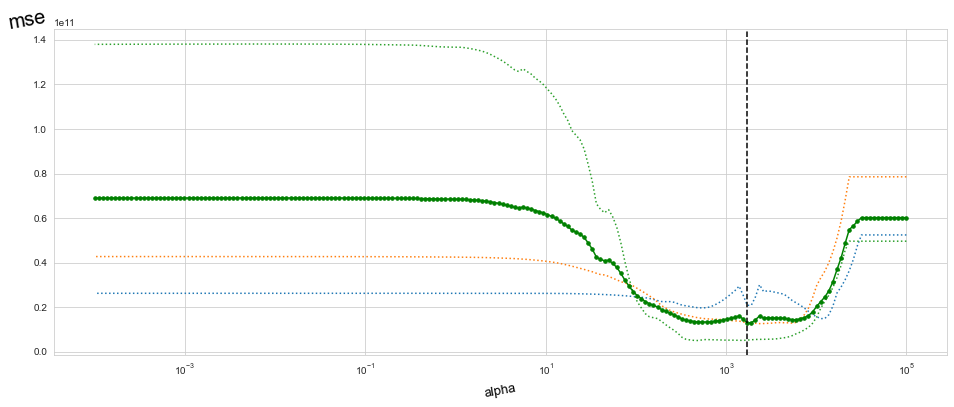

Performance on Training Data
  + RMSE: 68151.26928507
  + R squares: 0.90640856
Performance on Testing Data
  + RMSE: 129579.47132776
  + R squares: 0.90450617



endog=DEPOSIT--coef shrinkage:


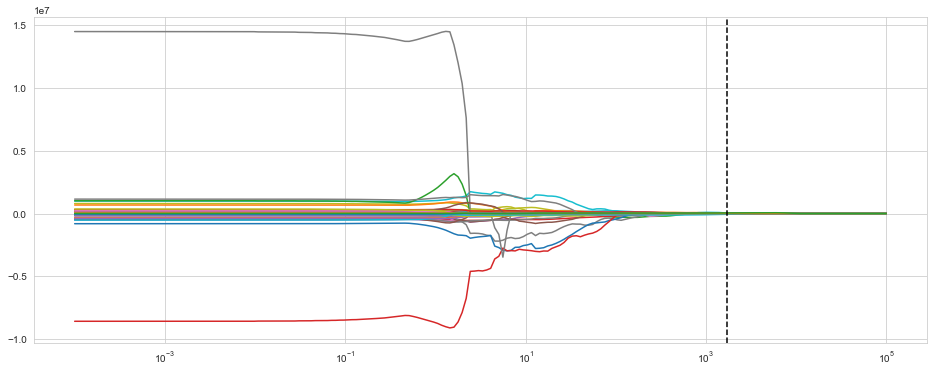

第11 round end 
 選進8個變數
stepwise選出的變數集合S:
 ['d1_M2', 'd1_ULC', 'STOCKTRADE', 'Q1', 'd1_IBF', 'pch_EROC', 'd1_EROC', 'pch_STOCKTRADE'] 

####################################################################################################
endog= IR ,cv=TimeSeriesSplit(n_splits=3)---------------------train last period: 2018Q4 ,test last period 2020Q4
best alpha:  0.005231099308056263
lasso選進 9 個
lasso選出的變數集合L: Index(['d1_FFR', 'd1_IRC', 'd1_M', 'd1_NU', 'd1_RMIBON', 'd1_SALES',
       'd1_TMUIA', 'pch_GDP', 'pch_IR'],
      dtype='object')


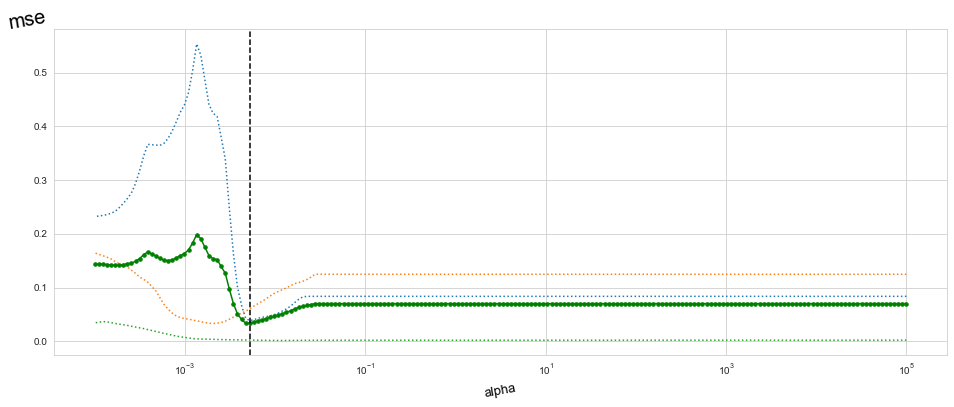

Performance on Training Data
  + RMSE: 0.12060783
  + R squares: 0.74791252
Performance on Testing Data
  + RMSE: 0.07133066
  + R squares: 0.24444260



endog=IR--coef shrinkage:


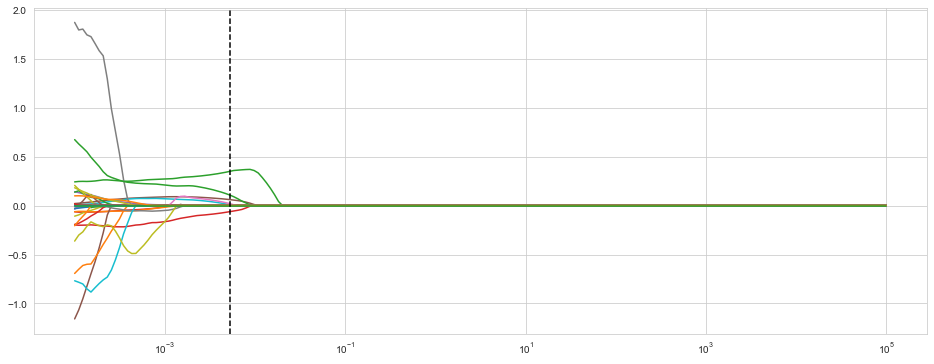

第9 round end 
 選進8個變數
stepwise選出的變數集合S:
 ['d1_IRC', 'd1_SALES', 'pch_IR', 'd1_M', 'd1_FFR', 'd1_NU', 'd1_TMUIA', 'd1_RMIBON'] 



In [270]:
endogs_nsplits = {'CF':3 ,'CO':3 ,'IBF':3 ,'J':3 ,'EX':4 , # 輸入 變數名:CV切的塊數
                  'M':2 ,'NU':3 ,'PSTOCK':4 ,'SALES':4 ,'FA':3 ,
                  'LOAN':3 ,'CPI':3 ,'PWM':3 ,'WPI':4 ,'MON':4 ,
                  'TISUB':3 ,'EROC':3 ,'AFR':3 ,'TMUIA':3 ,'DEP':3 ,
                  'NF':3,'BONDTRADE':2,'GDPMFG':3,'CPIZF':2,
                  'PGDP':3,'M2':3,'DEPOSIT':3,
                  'IR':3  # model4.1新增的
                 }
# 函數的: PDT,ULC,GDP,NE
regResults = pd.DataFrame(data={'endogs':endogs_nsplits.keys(),'nsplits':endogs_nsplits.values()})
regResults.set_index('endogs',inplace=True)
# regResults.head(3)
allres={}
for endog,nsplit in regResults.reset_index().iloc:
    L,S = lasso_stepwise(nadata=nadata,      # 放入未 partial out Lag.Y 的 data
                    endog=endog,   # 內生變數在data的欄位名
                    trainEndPeriod = '2018Q4',   # 留資料的後幾期當作test set
                    CV_n=nsplit,     # LassoCV的TimeSeriesSplit(n_splits= "n")
                    alphaRange=(-4,5), # 檢驗alpha的範圍: np.logspace(-1,3,num=100)
                    partialOutAR1 = True, # 是否要partial out AR(1) 的資料丟入Lasso
                    showFitR2 =True,  # (無關)顯示此Lasso模型在 test 的表現
                    showShrink=True ) # (無關)顯示Lasso係數收縮圖
    allres[endog] = (L,S)

In [297]:
cols = {'len_regressor':[],'len_L':[],'regressors':[],'L':[]}
for key,val in allres.items():
#     print('內生變數:',key,'--選進',len(val[1]),'個變數')
#     print('x:',val[1],'\n')
    cols['len_regressor'].append( len(val[1]) )
    cols['len_L'].append( len(val[0]) )
    cols['regressors'].append( val[1] )
    cols['L'].append( list(val[0]) )
sele = pd.DataFrame(data=cols,index=allres.keys())
regResults2 = pd.concat([regResults,sele],axis=1)
regResults2

nsplits  len_regressor  len_L  \
endogs                                     
CF               3             12     13   
CO               3             11     14   
IBF              3              9     10   
J                3              6      8   
EX               4             16     17   
M                2             12     14   
NU               3              5      5   
PSTOCK           4              7     11   
SALES            4              6     10   
FA               3              7     12   
LOAN             3              8      9   
CPI              3              9      9   
PWM              3              8     10   
WPI              4              7      9   
MON              4              8     10   
TISUB            3              4      4   
EROC             3              4      4   
AFR              3              5      6   
TMUIA            3              8      9   
DEP              3             13     22   
NF               3              8      8   
BONDTRADE        2              6      6   
GDPMFG           3              3      3   
CPIZF            2              5      7   
PGDP             3              2      2   
M2               3              7      8   
DEPOSIT          3              8     14   
IR               3              8      9   

                                                  regressors  \
endogs                                                         
CF         [Q3, d1_CHINAGDP, d1_CPI, d1_FIA, DEP, CO(-1),...   
CO         [Q3, GDP, d1_USAGNP, d1_IPXUSA, d1_FIA, d1_J, ...   
IBF        [d1_CF, d1_CHINAGDP, LOAN, pch_IBF, d1_TMUIA, ...   
J           [pch_M, d1_SALES, pch_ULC, Q2, d1_LOAN, pch_IRC]   
EX         [d1_M, d1_GDP, d1_J, d1_DEP, d1_IBF, d1_GDPMFG...   
M          [d1_EX, d1_J, d1_IBF, SALES(-1), EX, POILBRE(-...   
NU                     [d1_IR, Q3, d1_NE, pch_NU, pch_TISUB]   
PSTOCK     [STOCKTRADE, pch_PSTOCK, d1_EROC, pch_ADBNF, d...   
SALES      [d1_POILBRE, d1_MON, d1_PWM, d1_IR, CG, pch_SA...   
FA         [CHINAGDP, d1_AFR, Q1, FIA, pch_ULC, pch_JAPGD...   
LOAN       [pch_LOAN, GDPMFG, d1_ADBNF, d1_MON, d1_NE, d1...   
CPI        [Q1, pch_CPI, NE, d1_CF, CPIZF, pch_J, d1_M2, ...   
PWM        [d1_ULC, d1_CHINAGDP, NE(-1), d1_DEP, PDT, d1_...   
WPI        [d1_M, d1_DEP, d1_TMUIA, d1_EROC, pch_WPI, d1_...   
MON        [d1_PSTOCK, d1_GDP, pch_CPIZF, d1_M2, pch_IRC,...   
TISUB                          [PWM(-1), d1_DEP, PSTOCK, Q2]   
EROC                  [d1_PSTOCK, d1_EJAP, pch_EROC, d1_AFR]   
AFR                    [FA, d1_EROC, pch_IR, pch_AFR, d1_FA]   
TMUIA      [d1_POILBRE, d1_IPXUSA, d1_WPI, d1_EROC, d1_EJ...   
DEP        [d1_TISUB, d1_CHINAGDP, EX(-1), d1_WPI, d1_MON...   
NF         [d1_NE, d1_NU, d1_SALES, pch_TISUB, CG, d1_PST...   
BONDTRADE  [pch_BONDTRADE, d1_ADRESERVE, d1_ULC, pch_AFR,...   
GDPMFG                                  [d1_GDP, M2(-1), Q1]   
CPIZF                 [d1_ULC, Q3, pch_CPIZF, d1_CPI, d1_NU]   
PGDP                                          [d1_PWM, d1_M]   
M2         [d1_DEPOSIT, d1_PWM, Q1, d1_CPI, d1_ADRESERVE,...   
DEPOSIT    [d1_M2, d1_ULC, STOCKTRADE, Q1, d1_IBF, pch_ER...   
IR         [d1_IRC, d1_SALES, pch_IR, d1_M, d1_FFR, d1_NU...   

                                                           L  
endogs                                                        
CF         [DEP, IBF, d1_CHINAGDP, d1_CPI, d1_FA, d1_FIA,...  
CO         [CG, GDP, J, PDT, d1_CPIZF, d1_FIA, d1_IPXUSA,...  
IBF        [GDPMFG, LOAN, SALES, d1_CF, d1_CHINAGDP, d1_G...  
J          [d1_CPI, d1_LOAN, d1_SALES, pch_IRC, pch_M, pc...  
EX         [J, M, d1_BONDTRADE, d1_CF, d1_CHINAGDP, d1_DE...  
M          [EX, FA, POILBRE, d1_EX, d1_IBF, d1_IPXUSA, d1...  
NU                     [d1_IR, d1_NE, pch_NU, pch_TISUB, Q3]  
PSTOCK     [STOCKTRADE, TISUB, d1_EROC, d1_POILBRE, d1_SA...  
SALES      [CG, d1_IPXUSA, d1_IR, d1_MON, d1_POILBRE, d1_...  
FA         [CHINAGDP, FIA, d1_AFR, d1_CHINAGDP, d1_FIA, d...  
LOAN       [G

In [273]:
regResults2.to_excel(f'../data/{filename}_Select.xlsx')

#  modify regressor

In [274]:
pop_dict = {'CF':['d1_FIA','DEP','d1_FA','pch_FA','d1_EX','d1_CHINAGDP'], # 可調: d1_FIA
            'CO':['d1_FIA','d1_J'],
            'EX':['d1_J','J'],
            'M':['d1_J','SALES(-1)'], # SALES
            'FA':['pch_JAPGDP','pch_J' ],
            'LOAN':['d1_JAPGDP'],
            'CPI':['pch_J','d1_CHINAGDP'],
            'PWM':['CG','d1_JAPGDP'],
            'NF':['d1_NE','d1_NU'],
            'BONDTRADE':['d1_ULC','d1_PDT','KGDEBT(-1)'],
           }
plus_dict = {'NF':['Q3'],
            'BONDTRADE':['pch_FFR'], #加一個利率變數
            'IBF':['Q1','Q2','Q3']   #,'d1_DEP','IR']
            }
finals ={}
for row in regResults2.iloc:
    final = row['regressors'].copy()
    if row.name in pop_dict.keys():
#         print(row.name)
        for x in pop_dict[row.name]:
            if x in set(final):
                final.remove(x)
            else:
                print( f'內生{row.name}的迴歸因子中沒有{x}可移除' )
    if row.name in plus_dict.keys():
#         print(row.name)
        for x in plus_dict[row.name]:
            if x not in set(final):
                final.append(x)
            else:
                print( f'內生{row.name}的迴歸因子中已有{x}' )
    finals[row.name] = final
if 'final' in regResults2.columns:
    regResults2.pop('final')
regResults2 = pd.concat([regResults2,pd.DataFrame([finals.values()],columns=finals.keys(),index=['final']).T],axis=1)
regResults2.head(3)

內生CF的迴歸因子中沒有pch_FA可移除
內生CF的迴歸因子中沒有d1_EX可移除
內生FA的迴歸因子中沒有pch_J可移除
內生CPI的迴歸因子中沒有d1_CHINAGDP可移除
內生PWM的迴歸因子中沒有CG可移除
內生PWM的迴歸因子中沒有d1_JAPGDP可移除


nsplits  len_regressor  len_L  \
endogs                                  
CF            3             12     13   
CO            3             11     14   
IBF           3              9     10   

                                               regressors  \
endogs                                                      
CF      [Q3, d1_CHINAGDP, d1_CPI, d1_FIA, DEP, CO(-1),...   
CO      [Q3, GDP, d1_USAGNP, d1_IPXUSA, d1_FIA, d1_J, ...   
IBF     [d1_CF, d1_CHINAGDP, LOAN, pch_IBF, d1_TMUIA, ...   

                                                        L  \
endogs                                                      
CF      [DEP, IBF, d1_CHINAGDP, d1_CPI, d1_FA, d1_FIA,...   
CO      [CG, GDP, J, PDT, d1_CPIZF, d1_FIA, d1_IPXUSA,...   
IBF     [GDPMFG, LOAN, SALES, d1_CF, d1_CHINAGDP, d1_G...   

                                                    final  
endogs                                                     
CF      [Q3, d1_CPI, CO(-1), d1_PGDP, Q4, d1_IBF, d1_P...  
CO      [Q3, GDP, d1_USAGNP, d1_IPXUSA, d1_CPIZF, d1_P...  
IBF     [d1_CF, d1_CHINAGDP, LOAN, pch_IBF, d1_TMUIA, ...

In [275]:
regResults2.to_excel(f'../data/{filename}_Select_final.xlsx')

# load regressors table

In [314]:
regResults2 = pd.read_excel(f'../data/{filename}_Select_final.xlsx',engine='openpyxl')
regResults2.set_index('endogs',inplace=True)
def toList(x):
    return x.replace("'","").replace('[','').replace(']','').replace(' ','').split(',')    
regResults2['regressors'] = regResults2['regressors'].apply(lambda x: toList(x))
regResults2['L'] = regResults2['L'].apply(lambda x: toList(x))
regResults2['final'] = regResults2['final'].apply(lambda x: toList(x))

# check  regression
    show_tex_reg2 用來確認所有用到的解釋變數，是否都有設定成 y 或是外生變數。
        紅色字: 內生變數
        藍色字: 外生變數
        黑色字: 代表少跑迴歸或是少設定義式 (虛擬變數及定義式除外)
    show_tex_reg3 用來跟林建甫(2006)比較的。
        紅色字: 都有用到的解釋變數
        藍色字: 本模型的外生變數
        黑色字: otherwise


In [278]:
exogsName = ['CG','CHINAGDP','EJAP','FFR','FIA',
    'GOVSUB','IG','USAGNP','JAPGDP','IPXUSA',
    'KGDEBT','POILBRE','POP','STOCKTRADE',
    'IRI','IRC',  #此列的變數為新增的外生
    'ADBNF',"ADRESERVE",'RMIBON' # LASSO挑不出變數的
            ]  
# IR轉為內生
mutiFunc=['GDP = CF + CO + IBF + IG + IPC + J + CG + X - M',
          'NE = (1-0.01*NU)*NF',
          'PDT = GDP/NE',
          'ULC = PWM/PDT',
         ]
show_tex_reg2(endogsNameList=list(regResults2.index),
              exogsNameList=exogsName,
              regressors2D=regResults2['final'],
              plusTextList=mutiFunc)



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [279]:
show_tex_reg3(endogsNameList=list(regResults2.index),
              exogsNameList=exogsName,
              regressors2D=regResults2['final'],
              plusTextList=mutiFunc)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [280]:
# 每種變數被使用幾次
num_x=[]
for i in conv['對應簡稱']:
    n=0
    ys=[]
    for j in regResults2.iloc:
        if i in set(a.myVariableName(j['final'])):
            n+=1
            ys.append(j.name)
    if i in exogsName:
        text = '外生'
    else:
        text = ''
    num_x.append((n,i,conv.set_index('對應簡稱').loc[i]['對應中文'],text,', '.join(ys)))
num_x.sort()
num_x
df = pd.DataFrame(num_x,columns=['次數','變數','說明','是否外生','內生變數'])
df.to_excel(f'../data/{filename}_used_times.xlsx')
df

次數          變數              說明 是否外生  \
0    0          IG      政府固定資本形成毛額   外生   
1    0           J            存貨變動        
2    0      JAPGDP           日本GDP   外生   
3    0      KGDEBT        各級政府債務餘額   外生   
4    0         POP           台灣區人口   外生   
5    1     DEPOSIT      本國一般銀行存款餘額        
6    1      GOVSUB        政府企業補助支出   外生   
7    1         IRI         銀行業基準利率   外生   
8    1          NF           勞動力人口        
9    2   ADRESERVE    調整存款準備率後準備貨幣   外生   
10   2   BONDTRADE        債券市場總成交值        
11   2          CG          政府消費支出   外生   
12   2          CO       民間非食品消費支出        
13   2          EX         貨品及服務輸出        
14   2         FFR          聯邦資金利率   外生   
15   2         FIA      國外要素所得收入淨額   外生   
16   2         PDT         勞動生產力指數        
17   3       ADBNF  本國銀行對非金融機構證券投資   外生   
18   3      GDPMFG       製造業國內生產毛額        
19   3      IPXUSA        美國出口物價指數   外生   
20   3         IRC    第一商業銀行一年定存利率   外生   
21   3        LOAN  全體貨幣機構與郵匯局資產放款        
22   3      RMIBON          隔夜拆款利率   外生   
23   3  STOCKTRADE        上市股市總成交值   外生   
24   3       TMUIA      進口物價指數(美元)        
25   3      USAGNP           美國GNP   外生   
26   4         CPI         消費者物價指數        
27   4       CPIZF       核心消費者物價指數        
28   4         DEP        固定資本消耗準備        
29   4        EJAP           日圓/美元   外生   
30   4          FA             金融帳        
31   4         GDP          國內生產毛額        
32   4         MON             M1B        
33   4          NE            就業人口        
34   4          NU             失業率        
35   4        PGDP      國內生產毛額平減指數        
36   4     POILBRE           布蘭特原油   外生   
37   5         AFR          央行外匯存底        
38   5    CHINAGDP           中國GDP   外生   
39   5         IBF      民間固定資本形成毛額        
40   5          M2              M2        
41   5         PWM         製造業平均薪資        
42   5         WPI          躉售物價指數        
43   6          CF        民間食品消費支出        
44   6        EROC         美元兌台幣匯率        
45   6          IR          央行重貼現率        
46   6           M         貨品及服務輸入        
47   6      PSTOCK        集中市場股價指數        
48   6       TISUB           間接稅淨額        
49   6         ULC      單位產出勞動成本指數        
50   7       SALES          製造業銷售量        

                                      內生變數  
0                                           
1                                           
2                                           
3                                           
4                                           
5                                       M2  
6                                      CPI  
7                                      MON  
8                                      IBF  
9                            BONDTRADE, M2  
10                           EX, BONDTRADE  
11                               SALES, NF  
12                                  CF, CO  
13                                  M, DEP  
14                           BONDTRADE, IR  
15                                 FA, DEP  
16                                 CO, PWM  
17                       PSTOCK, LOAN, DEP  
18                           IBF, EX, LOAN  
19                            CO, M, TMUIA  
20                              J, MON, IR  
21                            IBF, J, LOAN  
22                           LOAN, WPI, IR  
23                    PSTOCK, MON, DEPOSIT  
24                            IBF, WPI, IR  
25                             CF, CO, DEP  
26                      CF, CPI, CPIZF, M2  
27                     CO, CPI, MON, CPIZF  
28                     EX, PWM, WPI, TISUB  
29                    EX, EROC, TMUIA, DEP  
30                      EX, M, PSTOCK, AFR  
31                     CO, EX, MON, GDPMFG  
32                    CO, SALES, LOAN, DEP  
33                      NU, LOAN, CPI, PWM  
34                     NU, LOAN, CPIZF, IR  
35                         CF, M, PWM, DEP  
36                 M, PSTOCK, SALES, TMUIA  
37         FA, EROC, AFR, TMUIA, BONDTRADE  
38          

# macro model

In [321]:
def macro_model(data, #(nadata) 放入每個變數最大樣本期間的DataFrame
                endogs, # 內生變數名稱 list
                regResults2, # 有迴歸變數組合的DataFrame
                regressor_column, #(final) regResults2中解釋變數的欄位名稱
                trainStart, # ex: '1995Q1'
                trainEnd, # '2018Q4'
                testEnd): 
    partialout_on =True
    trainStartPeriod = pd.Period(trainStart, 'Q-DEC')
    trainEndPeriod = pd.Period(trainEnd, 'Q-DEC')
#     endogs = list(regResults2.index)+['GDP','NE','PDT','ULC']
    print('所有內生:',endogs)
    ####### train期間內每條回歸的smpl DataFrame、係數方程式 DataFrame、外生變數名 list #########
    trainPeriodRange = pd.period_range(start = trainStartPeriod,end =trainEndPeriod)
    train_smpls =[] # 每條迴歸的dataFrame
    train_ols_results=[] # 回頭檢查回歸用
    train_equDfs = [] # 每條迴歸的coef表示成函數 f(y,y(-1),exogs)=0 的dataFrame
    all_exogs = [] # 存出所有外生變數名稱
    # variable_2D = [ [y ,y(-1) , exogs],[y ,y(-1) , exogs],... ]
    variable_2D=[]
    for row in regResults2.iloc:
        if partialout_on:
            variable_2D.append([row.name,f'{row.name}(-1)']+row[regressor_column])
        else:
            variable_2D.append([row.name]+row[regressor_column])
    # regNum,variables = 0,variable_2D[0]
    for regNum,variables in enumerate(variable_2D):
    #     smpl = s.smpl_all(variables).loc[:trainEndPeriod] #最大樣本期間
        smpl = data[variables].loc[:trainEndPeriod].dropna() #最大樣本期間
        train_smpls.append(smpl)
        yName = smpl.columns[0]
        y = smpl[yName] # y固定為第一個元素
        X = smpl.copy()
        X.pop(yName)
        X = sm.add_constant(X)
        ols_results = sm.OLS(y, X).fit()
        train_ols_results.append(ols_results)
        params_df = pd.DataFrame(data=ols_results.params,columns=[yName])
        ###
        # part b: 將回歸的 y 放在 columns 並定義係數為 -1 (似等號另一邊為 0 ) 
        equDf = params_df.T.copy()
        equDf[params_df.columns[0]] = -1
        equDf.set_axis( [regNum] ,inplace=True)
        train_equDfs.append(equDf)
        # c: 存出回歸中哪些變數與聯立解的內生變數無關的list，方便下面自動執行外生係數乘
        exogs=[]
        for i,name in enumerate( a.myVariableName(variables) ):
            if name not in set(endogs):
                exogs.append(variables[i])
    #     print(regResults2.iloc[regNum].name,'\n',regResults2[regressor_column].iloc[regNum])
    #     print(exogs,'\n#################################################')
        all_exogs.append(exogs)

    ############## 2. train期間聯立解存到 predictDf ################
    
    # 新增聯立解用的一條方程式:
    # CF + CO + IBF + IG + IPC + J + CG + X - M = GDP
    # CF + CO + IBF + J + X - M - GDP + const = 0  ( const=IG+IPC+CG )
    gdpdf = s.smpl_all(['CF','CO','IBF','IG','IPC','J','CG','EX','M','GDP'])
    gdpequs = pd.DataFrame([[1,1,1,1,1,-1,-1,1]],columns=['CF','CO','IBF','J','EX','M','GDP','const'],index=gdpdf.index)
    gdpequs['const'] = gdpdf[['IG','IPC','CG']].T.sum() # 每期的coef跟const
    # 已確認相等(gdpdf[gdpequs.columns[:-1]]*gdpequs[gdpequs.columns[:-1]]).T.sum()*(-1) == gdpequs['const']

    root_rowdata=[]
    root_indexs=[]
    endogDf = data[endogs]
    # 從 train第一期聯立解到最後一期的rowdata存進 predictDf DataFrame
    for period in trainPeriodRange:
        # period = trainPeriodRange[0]
        print(period,end=',')
        allEqu = pd.DataFrame()
        for regNum,variables in enumerate(variable_2D):
    #         print(regNum,variables)
            smpl,equDf,exogs = train_smpls[regNum],train_equDfs[regNum],all_exogs[regNum]
            # part d: 將 part c的外生變數之係數*真實值與常數項 (估計誤差不納入計算)，與內生變數併入 equDf2
            const = equDf['const'].values[0] + (smpl[exogs].loc[period]*equDf[exogs]).T.sum()  # float
            ### 納入residual的話聯立解會完全等於真實值，用來檢查過程有無錯誤
    #         residual = train_ols_results[regNum].resid.loc[period] # float
    #         const = const + residual
    #         print(regNum,'resid into const')
            cols = []
            for c in equDf.columns:
                if c not in exogs and c != 'const':
                    cols.append(c)
            equDf2 = equDf[cols].copy()
            equDf2['const'] = const # equDf2 = 內生變數相關 (例如:年增率,差分,lag期)的係數跟方程式的常數項
    #         print('外生乘係數加進常數項後剩的columns:',equDf2.columns)
            # part e:轉換成當期函數

            # 找出差分項，再將lag期真實值乘係數加進const，ex: d1_xxxxx
            # def equDf2_adj_dif(self,equDf2,solvePeriod,difName=None,difNum=None) 
            solvePeriod,difName,difNum=period,None,None #  difName = 'd1_RMIBON', difName = None : 自動搜索
            difs = []
            if difName==None: #找出差分項的名稱
                for name in equDf2.columns:
                    if re.search('d\d_',name):
                        difs.append(name)
            else:
                difs.append(difName)
    #         print(f'差分項:{difs}')
            for difName in difs:
                result = re.search('d(\d)_',difName)
                if result:
                    difNum= int(result.group(1))
                    ori_x = difName.split(result.group())[-1]
                else: #  其他非照規則(d1_)的自定義差分項
                    ori_x = difName
                    if difNum == None:
                        difNum=1
    #             print(ori_x,difNum,end=',')
                df = s.smpl_all([ori_x])
                lagValue= df.loc[solvePeriod-difNum].values * equDf2[difName].values
                equDf2['const'] = equDf2['const'].values - lagValue
                if ori_x in equDf2.columns:
    #                 print(f'將同為{ori_x}的係數相加')
                    equDf2[ori_x] = equDf2[ori_x].values + equDf2[difName].values
                    equDf2.pop(difName)
                else:
            #         print(f'原{difName}改名為{ori_x}')
                    equDf2.rename(columns={difName:ori_x},inplace=True)
            # 找出lag項真實值乘係數加進const 
            # def equDf2_adj_lag(self,equDf2,solvePeriod):
            solvePeriod= period
    #         print('\nlag項:',end=' ')
            for name in equDf2.columns:
                result = re.search('(\w*)\(-(\d)\)',name)
                if result:
                    x = result.group(1)
                    lagNum = int(result.group(2))
    #                 print(x,lagNum,end=',')
                    df = s.smpl_all([x])
                    lagValue = df.loc[solvePeriod-lagNum].values * equDf2[name].values
                    equDf2['const'] = equDf2['const'].values + lagValue
                    equDf2.pop(name)

            # 找出年增率處理成當期
    #         print('\n年增率項:',end=' ')
            for name in equDf2.columns:
                if 'pch_' in name:
                    ori_x = name.split('pch_')[1]
    #                 print(name,'->',ori_x,end=', ')
                    equDf2['const'] = equDf2['const'].values-equDf2[name]
                    df= s.smpl_all([ori_x])
                    equDf2[name] = equDf2[name].values/df.loc[solvePeriod-4].values # coef/y(-4)
                    # 若該年增率的內生變數剛好是這條回歸的y時，當pch_y轉成y後的係數coef/y(-4)可與係數為-1的y係數相加
                    if ori_x in equDf2.columns:
    #                     print(f'將同為{ori_x}的係數相加')
                        equDf2[ori_x] = equDf2[ori_x].values + equDf2[name].values
                        equDf2.pop(name)
                    else:
    #                     print(f'原{name}改名為{ori_x}')
                        equDf2.rename(columns={name:ori_x},inplace=True)
    #         print(f'\n處理完的columns:{equDf2.columns}')
            allEqu=pd.concat([allEqu,equDf2])
        # equ: CF + CO + IBF + J + X - M - GDP + const = 0  ( const=IG+IPC+CG )
        equ = pd.DataFrame(gdpequs.loc[period]).T
        allEqu = pd.concat([allEqu,equ])

        allEqu = allEqu[endogs+['const']]
        # part f: 猜該期真實值 解聯立
        guess = endogDf.loc[period].values
        ###
        def system(z,allEqu=allEqu): 
        #     if allEqu.columns[-1] != 'const':
        #         n = list(allEqu.columns).index('const')
        #         allEqu = allEqu[list(allEqu.columns[:n])+list(allEqu.columns[n+1:])+['const']]
            colNum={} # colNum[內生變數名] = 內生變數的欄位順序
            for i,col in enumerate(allEqu.columns):
                colNum[col] = i
            f= np.zeros(allEqu.shape[0]+3) # 3個額外的函數就加3
            # 適用於每條方程式皆係數*value加常數項
            for i,equ in enumerate(allEqu.iloc):
                f[i] = (equ[:-1]*z).sum()+ equ['const']
            # 函數裡的變數剛好全是內生變數時(都有在allEqu)
            f[-3] = (1-0.01*z[colNum['NU']])*z[colNum['NF']] - z[colNum['NE']] # NE = (1-0.01*NU)*NF
            f[-2] = z[colNum['GDP']]/z[colNum['NE']] -z[colNum['PDT']] # PDT = GDP/NE
            f[-1] = z[colNum['PWM']]/z[colNum['PDT']] -z[colNum['ULC']] # ULC = PWM/PDT
            return f
        root = fsolve(system,guess)  # method='hybr'
        # roots = newton_krylov(system,guess)
        root_rowdata.append(root)
        root_indexs.append(period)

    predictDf = pd.DataFrame(root_rowdata,columns=endogs,index=root_indexs)
    train_pred = predictDf.copy() #備用
    
    ############ 3. testing set predict ################
    testEndPeriod =  pd.Period(testEnd, 'Q-DEC')
    testPeriodRange = pd.period_range(start = trainEndPeriod+1,end =testEndPeriod)
    for period in testPeriodRange:
        print(period,end=',')
        allEqu = pd.DataFrame()
        for regNum,variables in enumerate(variable_2D):
            equDf,exogs =train_equDfs[regNum],all_exogs[regNum]
            # part d: 將 part c的外生變數之係數*真實值與常數項 (估計誤差不納入計算)，與內生變數併入 equDf2
            ### 外生變數暫時直接給定真實值(from data)###
        #     print(exogs)
            const = equDf['const'].values[0] + (data[exogs].loc[period]*equDf[exogs]).T.sum()  # float
            ### 納入residual的話聯立解會完全等於真實值，用來檢查過程有無錯誤
    #         residual = train_ols_results[regNum].resid.loc[period] # float
    # #         print(regNum,'resid into const')
    #         const = const + residual
            cols = []
            for c in equDf.columns:
                if c not in exogs and c != 'const':
                    cols.append(c)
            equDf2 = equDf[cols].copy()
            equDf2['const'] = const # equDf2 = 內生變數相關 (例如:年增率,差分,lag期)的係數跟方程式的常數項
        #     print('外生乘係數加進常數項後剩的columns:',equDf2.columns)
            # part e:轉換成當期函數
            # 找出差分項，再將lag期真實值乘係數加進const，ex: d1_xxxxx
        #     print('差分項:',end=' ')
            solvePeriod,difName,difNum=period,None,None
            difs = []
            if difName==None: # 自動找出差分項的名稱
                for name in equDf2.columns:
                    if re.search('d\d_',name):
                        difs.append(name)
            # else: # 有給定差分項變數名稱時
            #     difs.append(difName)
            for difName in difs:
                result = re.search('d(\d)_',difName)
                if result: 
                    difNum= int(result.group(1))
                    ori_x = difName.split(result.group())[-1]
        #             print(ori_x,difNum,end=',')
            #     else: #  其他非照規則(d1_)的自定義差分項，目前沒有
            #         ori_x = difName
            #         if difNum == None:
            #             difNum=1
                lagValue= predictDf.loc[solvePeriod-difNum][ori_x] * equDf2[difName].values #用 in-sample-pre的值
                equDf2['const'] = equDf2['const'].values - lagValue
                if ori_x in equDf2.columns:
        #             print(f'將同為{ori_x}的係數相加')
                    equDf2[ori_x] = equDf2[ori_x].values + equDf2[difName].values
                    equDf2.pop(difName)
                else:
        #             print(f'原{difName}改名為{ori_x}')
                    equDf2.rename(columns={difName:ori_x},inplace=True)

            # 找出lag項真實值乘係數加進const 
            # def equDf2_adj_lag(self,equDf2,solvePeriod):
            solvePeriod= period
        #     print('lag項:',end=' ')
            for name in equDf2.columns:
                result = re.search('(\w*)\(-(\d)\)',name)
                if result:
                    ori_x = result.group(1)
                    lagNum = int(result.group(2))
        #             print(ori_x,lagNum,end=',')
                    lagValue = predictDf.loc[solvePeriod-lagNum][ori_x] * equDf2[name].values #用 in-sample-pre的值
                    equDf2['const'] = equDf2['const'].values + lagValue
                    equDf2.pop(name)

            # 找出年增率處理成當期
        #     print('\n年增率項:',end=' ')
            for name in equDf2.columns:
                if 'pch_' in name:
                    ori_x = name.split('pch_')[1]
        #             print(name,'->',ori_x,end=', ')
                    equDf2['const'] = equDf2['const'].values-equDf2[name]
                    equDf2[name] = equDf2[name].values/predictDf.loc[solvePeriod-4][ori_x] # coef/y(-4) #用 in-sample-pre的值
                    # 若該年增率的內生變數剛好是這條回歸的y時，當pch_y轉成y後的係數coef/y(-4)可與係數為-1的y係數相加
                    if ori_x in equDf2.columns:
        #                 print(f'將同為{ori_x}的係數相加')
                        equDf2[ori_x] = equDf2[ori_x].values + equDf2[name].values
                        equDf2.pop(name)
                    else:
        #                 print(f'原{name}改名為{ori_x}')
                        equDf2.rename(columns={name:ori_x},inplace=True)
                    break

        #     print(f'\n處理完的columns:{equDf2.columns}')
            allEqu=pd.concat([allEqu,equDf2])

        # equ: CF + CO + IBF + J + X - M - GDP + const = 0  ( const=IG+IPC+CG )
        equ = pd.DataFrame(gdpequs.loc[period-1]).T
        allEqu = pd.concat([allEqu,equ])
        allEqu = allEqu[endogs+['const']]
        # part f: 猜該期真實值 解聯立
        guess = endogDf.loc[period-1].values
        def system(z,allEqu=allEqu): 
            #     if allEqu.columns[-1] != 'const':
            #         n = list(allEqu.columns).index('const')
            #         allEqu = allEqu[list(allEqu.columns[:n])+list(allEqu.columns[n+1:])+['const']]
            colNum={} # colNum[內生變數名] = 內生變數的欄位順序
            for i,col in enumerate(allEqu.columns):
                colNum[col] = i
            f= np.zeros(allEqu.shape[0]+3) # 3個額外的函數就加3
            # 適用於每條方程式皆係數*value加常數項
            for i,equ in enumerate(allEqu.iloc):
                f[i] = (equ[:-1]*z).sum()+ equ['const']
            # 函數裡的變數剛好全是內生變數時(都有在allEqu)
            f[-3] = (1-0.01*z[colNum['NU']])*z[colNum['NF']] - z[colNum['NE']] # NE = (1-0.01*NU)*NF
            f[-2] = z[colNum['GDP']]/z[colNum['NE']] -z[colNum['PDT']] # PDT = GDP/NE
            f[-1] = z[colNum['PWM']]/z[colNum['PDT']] -z[colNum['ULC']] # ULC = PWM/PDT
            return f
        root = fsolve(system,guess)  # method='hybr'
        # roots = newton_krylov(system,guess)
        predictDf = pd.concat([predictDf,pd.DataFrame([root],columns=endogs,index=[period])],axis=0)
        
    return predictDf

endogs = list(regResults2.index)+['GDP','NE','PDT','ULC']
predictDf = macro_model(data=nadata,
                        endogs = endogs, 
                        regResults2=regResults2,
                        regressor_column='final',
                        trainStart='1995Q1',
                        trainEnd='2018Q4',
                        testEnd='2020Q4')

所有內生: ['CF', 'CO', 'IBF', 'J', 'EX', 'M', 'NU', 'PSTOCK', 'SALES', 'FA', 'LOAN', 'CPI', 'PWM', 'WPI', 'MON', 'TISUB', 'EROC', 'AFR', 'TMUIA', 'DEP', 'NF', 'BONDTRADE', 'GDPMFG', 'CPIZF', 'PGDP', 'M2', 'DEPOSIT', 'IR', 'GDP', 'NE', 'PDT', 'ULC']
1995Q1,1995Q2,

C:\Users\user\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1995Q3,1995Q4,1996Q1,1996Q2,1996Q3,1996Q4,1997Q1,1997Q2,1997Q3,1997Q4,1998Q1,1998Q2,1998Q3,1998Q4,1999Q1,1999Q2,1999Q3,1999Q4,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q2,2002Q3,2002Q4,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,2004Q3,2004Q4,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,2007Q3,2007Q4,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,

In [327]:
start,end ='1995Q1','2020Q4'
predictDf['real GDP'] = (predictDf['GDP']/predictDf['PGDP']*100).loc[start:end]
predictDf['growth rate']=(predictDf['GDP']/predictDf['PGDP']*100).loc[start:end].pct_change(4).dropna()
predictDf.to_excel(f'../data/{filename}_root_2020Q4.xlsx')

# performance table

In [328]:
# 讀進預測值資料
predictDf = pd.read_excel(f'../data/{filename}_root_2020Q4.xlsx',engine='openpyxl')
predictDf.rename({predictDf.columns[0]:'DATE'},axis='columns',inplace=True)
predictDf.set_index('DATE',inplace=True)
predictDf.index = pd.period_range(start= predictDf.index[0],end=predictDf.index[-1],freq='q')
predictDf.head(3)

CF             CO            IBF              J  \
1995Q1  130484.053597  858276.867050  395456.969687   11010.670671   
1995Q2  118653.064121  810603.098423  341067.641389 -103893.602612   
1995Q3  143839.822259  885943.158280  325532.331164   39371.720692   

                   EX              M        NU       PSTOCK          SALES  \
1995Q1  969680.557520  928530.851936  1.558149  5618.583679  534781.989191   
1995Q2  749693.350998  692811.505306  1.253053  5516.294897  469129.596095   
1995Q3  916345.797230  911301.103367  2.120624  4865.042535  520045.220443   

                  FA  ...       PGDP             M2       DEPOSIT        IR  \
1995Q1   6654.088859  ...  97.499771  115909.222249  6.937312e+06  5.586870   
1995Q2  43682.248685  ...  90.796648  116542.481731  7.265896e+06  5.690324   
1995Q3  -3166.458642  ...  99.282628  122243.941208  7.475888e+06  5.427131   

                 GDP           NE         PDT         ULC      real GDP  \
1995Q1  1.952512e+06  9101.016437  214.537824  150.947367  2.002581e+06   
1995Q2  1.774875e+06  9209.205226  192.639407    0.524391  1.954780e+06   
1995Q3  1.877627e+06  9011.095187  208.368316  163.002959  1.891194e+06   

        growth rate  
1995Q1          NaN  
1995Q2          NaN  
1995Q3          NaN  

[3 rows x 34 columns]

In [333]:
# 讀進真實值
nadata = pd.read_excel(f'../data/data_set/{filename}_206_withNA.xlsx',engine='openpyxl')
nadata.rename({nadata.columns[0]:'DATE'},axis='columns',inplace=True)
nadata.set_index('DATE',inplace=True)
nadata.index = pd.period_range(start= nadata.index[0],end=nadata.index[-1],freq='q')
ori_data= nadata.copy()
print(nadata.shape)


(408, 206)


In [334]:
nadata['real GDP'] = (nadata['GDP']/nadata['PGDP']*100).loc[start:end]
nadata['growth rate']=(nadata['GDP']/nadata['PGDP']*100).loc[start:end].pct_change(4).dropna()
nadata = nadata.loc[start:end]
nadata

ADBNF  ADRESERVE       AFR  BONDTRADE        CF        CG  \
1995Q1  1014805.0  1723126.0   97934.0  1557198.0  129255.0  334814.0   
1995Q2  1074236.0  1742965.0  100412.0  2010489.0  127486.0  304331.0   
1995Q3   816447.0  1679411.0   90607.0  1654439.0  137722.0  303690.0   
1995Q4  1138882.0  1638073.0   90310.0  2023242.0  134458.0  307182.0   
1996Q1  1056053.0  1635163.0   82546.0  2217742.0  134896.0  357608.0   
...           ...        ...       ...        ...       ...       ...   
2019Q4  4446566.0  4298548.0  478126.0  4444668.0  308931.0  716340.0   
2020Q1  4649712.0  4430778.0  480385.0  6086866.0  327185.0  699888.0   
2020Q2  4708809.0  4530939.0  488691.0  4234410.0  323085.0  640892.0   
2020Q3  4824550.0  4678165.0  499598.0  4419769.0  358631.0  672417.0   
2020Q4  4836536.0  4836231.0  529911.0  3689780.0  321209.0  760261.0   

        CHINAGDP         CO     CPI   CPIZF  ...  pch_USAGNP   pch_WPI  \
1995Q1   12111.7   833659.0   78.43   81.29  ...    0.057273  0.079967   
1995Q2   14612.9   844806.0   79.73   83.31  ...    0.047300  0.076222   
1995Q3   16164.1   873036.0   80.07   83.25  ...    0.047550  0.081403   
1995Q4   18451.2   888673.0   80.46   84.02  ...    0.043799  0.057620   
1996Q1   14628.0   924182.0   80.80   84.34  ...    0.046824  0.025975   
...          ...        ...     ...     ...  ...         ...       ...   
2019Q4  276798.0  2222943.0  102.76  102.72  ...    0.039933 -0.049919   
2020Q1  205727.0  2072874.0  102.39  102.54  ...    0.020715 -0.051145   
2020Q2  248985.1  1956338.0  101.70  102.87  ...   -0.089304 -0.112569   
2020Q3  264976.3  2077023.0  102.53  102.74  ...   -0.020095 -0.054895   
2020Q4  296297.8  2176773.0  102.86  103.41  ...   -0.014701 -0.027422   

         pch_PDT   pch_ULC  Q1  Q2  Q3  Q4      real GDP  growth rate  
1995Q1  0.072487 -0.002033   1   0   0   0  1.760232e+06          NaN  
1995Q2  0.067074 -0.010592   0   1   0   0  1.839821e+06          NaN  
1995Q3  0.089623 -0.031216   0   0   1   0  1.872538e+06          NaN  
1995Q4  0.095156 -0.052979   0   0   0   1  1.935374e+06          NaN  
1996Q1  0.089843 -0.029353   1   0   0   0  1.861923e+06     0.057771  
...          ...       ...  ..  ..  ..  ..           ...          ...  
2019Q4  0.029426 -0.008607   0   0   0   1  5.075438e+06     0.036872  
2020Q1  0.016361 -0.005174   1   0   0   0  4.642948e+06     0.025134  
2020Q2  0.016966 -0.009966   0   1   0   0  4.726325e+06     0.003502  
2020Q3  0.065362 -0.077603   0   0   1   0  5.088020e+06     0.042602  
2020Q4  0.074625 -0.059275   0   0   0   1  5.333820e+06     0.050908  

[104 rows x 208 columns]

In [337]:
# train
rmse,mspe,r2,note=[],[],[],[]
for endog in predictDf.columns:
    if endog in set(conv['對應簡稱']):
        note.append(conv.set_index('對應簡稱').loc[endog]['對應中文'])
    else:
        note.append('')
    y_hat_train = predictDf[endog].loc['1995Q1':'2018Q4'].dropna()
    y_train= nadata[endog].loc[y_hat_train.index[0]:y_hat_train.index[-1]]
    rmse.append( np.sqrt(mean_squared_error(y_train, y_hat_train)) )
    mspe.append( (np.mean(np.square((y_train - y_hat_train) / y_train))*100) )
    r2.append( r2_score(y_train, y_hat_train) )

df = pd.DataFrame({'說明':note,'endogs':predictDf.columns,'rmse':rmse,'mspe':mspe,'r2':r2})
df=df.round(3)
df.to_excel(f'../data/{filename}_r2mspe_train.xlsx')
df.sort_values(by='r2',ascending=False)

說明       endogs         rmse      mspe     r2
14             M1B          MON   120931.633     0.050  0.999
26      本國一般銀行存款餘額      DEPOSIT   212268.306     0.021  0.999
25              M2           M2     2421.295     0.015  0.999
19        固定資本消耗準備          DEP     4491.794     0.016  0.999
10  全體貨幣機構與郵匯局資產放款         LOAN   155835.435     0.008  0.999
17          央行外匯存底          AFR     7509.339     0.351  0.997
20           勞動力人口           NF       43.959     0.002  0.997
1        民間非食品消費支出           CO    21047.765     0.021  0.996
29            就業人口           NE       56.526     0.004  0.995
23       核心消費者物價指數        CPIZF        0.394     0.002  0.994
18      進口物價指數(美元)        TMUIA        1.497     0.021  0.994
11         消費者物價指數          CPI        0.605     0.005  0.992
0         民間食品消費支出           CF     6289.152     0.078  0.987
27          央行重貼現率           IR        0.176     0.965  0.986
28          國內生產毛額          GDP    98247.739     0.116  0.985
32                     real GDP   116610.261     0.169  0.982
4          貨品及服務輸出           EX   129147.068     0.529  0.975
8           製造業銷售量        SALES    34201.850     0.197  0.975
5          貨品及服務輸入            M   108428.056     0.456  0.974
30         勞動生產力指數          PDT        9.264     0.102  0.971
13          躉售物價指數          WPI        1.942     0.035  0.960
6              失業率           NU        0.201     0.314  0.955
22       製造業國內生產毛額       GDPMFG    67243.312     0.647  0.954
7         集中市場股價指數       PSTOCK      524.125     0.676  0.902
15           間接稅淨額        TISUB    11610.780     0.475  0.880
2       民間固定資本形成毛額          IBF    57465.119     1.867  0.874
24      國內生產毛額平減指數         PGDP        1.657     0.027  0.863
21        債券市場總成交值    BONDTRADE  2397002.405     4.508  0.860
16         美元兌台幣匯率         EROC        1.004     0.103  0.783
12         製造業平均薪資          PWM     4612.084     1.969  0.635
3             存貨變動            J    30346.439  1166.354  0.085
31      單位產出勞動成本指數          ULC       22.358     2.273 -0.029
9              金融帳           FA     7942.185  2643.378 -0.101
33                  growth rate        0.042  1135.468 -0.376

In [338]:
# test
rmse,mspe,r2,note=[],[],[],[]
for endog in predictDf.columns:
    if endog in set(conv['對應簡稱']):
        note.append(conv.set_index('對應簡稱').loc[endog]['對應中文'])
    else:
        note.append('')
    y_hat_train = predictDf[endog].loc['2019Q1':'2020Q4'].dropna()
    y_train= nadata[endog].loc[y_hat_train.index[0]:y_hat_train.index[-1]]
    rmse.append( np.sqrt(mean_squared_error(y_train, y_hat_train)) )
    mspe.append( (np.mean(np.square((y_train - y_hat_train) / y_train))*100) )
    r2.append( r2_score(y_train, y_hat_train) )

df = pd.DataFrame({'說明':note,'endogs':predictDf.columns,'rmse':rmse,'mspe':mspe,'r2':r2})
df=df.round(3)
df.to_excel(f'../data/{filename}_r2mspe_test.xlsx')
df.sort_values(by='r2',ascending=False)

說明       endogs         rmse     mspe       r2
10  全體貨幣機構與郵匯局資產放款         LOAN   212267.699    0.005    0.958
14             M1B          MON   423545.692    0.038    0.896
23       核心消費者物價指數        CPIZF        0.118    0.000    0.866
31      單位產出勞動成本指數          ULC        7.988    0.436    0.840
26      本國一般銀行存款餘額      DEPOSIT   630643.676    0.029    0.839
25              M2           M2     7292.724    0.024    0.830
12         製造業平均薪資          PWM     4569.784    0.705    0.555
19        固定資本消耗準備          DEP    12779.901    0.027    0.400
7         集中市場股價指數       PSTOCK     1097.355    0.947    0.279
32                     real GDP   225299.233    0.234    0.217
0         民間食品消費支出           CF    15150.015    0.208   -0.032
3             存貨變動            J    36776.622  281.199   -0.092
28          國內生產毛額          GDP   259390.404    0.309   -0.117
30         勞動生產力指數          PDT       22.366    0.303   -0.153
18      進口物價指數(美元)        TMUIA        4.158    0.160   -0.174
11         消費者物價指數          CPI        0.468    0.002   -0.187
22       製造業國內生產毛額       GDPMFG   132710.113    0.915   -0.287
5          貨品及服務輸入            M   231483.715    1.034   -0.836
4          貨品及服務輸出           EX   270883.101    0.939   -0.975
15           間接稅淨額        TISUB    36504.014    2.730   -0.985
24      國內生產毛額平減指數         PGDP        1.769    0.031   -1.025
1        民間非食品消費支出           CO   114899.793    0.309   -1.323
17          央行外匯存底          AFR    31280.828    0.401   -1.362
6              失業率           NU        0.187    0.237   -1.386
9              金融帳           FA     8319.623  385.807   -1.770
8           製造業銷售量        SALES    85758.211    0.742   -1.836
13          躉售物價指數          WPI        8.296    0.721   -4.108
29            就業人口           NE       45.715    0.002   -4.568
2       民間固定資本形成毛額          IBF    75149.714    0.623   -6.421
33                  growth rate        0.043  553.993   -8.641
20           勞動力人口           NF       62.555    0.003  -11.857
21        債券市場總成交值    BONDTRADE  3550753.553   77.882  -23.878
16         美元兌台幣匯率         EROC        4.839    2.651  -30.024
27          央行重貼現率           IR        1.312  134.626 -109.170

# performance plot

In [346]:
def line(y,
         yh,
         model_name,
         savePath,
         resid_ybound=True):
    t=y.index.strftime('%fQ%q')
    dataResid = y-yh
    lineZero = [0]*len(t)
    fig, ax1 = plt.subplots()
    ax1.plot(t, dataResid, color='green',linestyle=(0, (1, 1)),marker='v',markersize=5,linewidth=2)
    ax1.plot(t,lineZero,color='black',linestyle=':')
    ax1.set_xlabel(xlabel='time(Q)',size=13,color='black',rotation=10)
    ax1.set_ylabel(ylabel='resid',size=20,color='green',rotation=0,position=(0,0.95))
    ax1.tick_params(axis='x', labelcolor='black',labelrotation=10,labelsize=13)
    ax1.tick_params(axis='y', labelcolor='green',labelsize=13)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    if type(y) == pd.core.series.Series:
        r2 = r2_score(y,yh)
        train_rmse = np.sqrt(mean_squared_error(y.loc['1995Q1':'2018Q4'],yh.loc['1995Q1':'2018Q4']))
        test_rmse = np.sqrt(mean_squared_error(y.loc['2019Q1':'2020Q4'],yh.loc['2019Q1':'2020Q4']))
    #             ax1.set_title(label='R-squared=%.3f ,rmse = %.3f'%(r2,rmse),fontdict={'fontsize':20})
        num = 4
        if train_rmse >99:
            num = 0
        ax1.set_title(label=f'train RMSE: %.{num}f,  test RMSE: %.{num}f'%(train_rmse,test_rmse),fontdict={'fontsize':20})
        ax2.plot(t, y, color='mediumblue',marker='o',markersize=3.5,linewidth=1.5)

    ax2.plot(t, yh, color='tab:red',linestyle=(0, (5, 5)),marker="d",markersize=6,linewidth=2)
    if resid_ybound:
        # 取得上下界的值
        y2min,y2max = ax2.get_ybound()
        up_bound = (y2max-y2min)/2
        # 設定顯示哪些刻度，此例切8等分
        ax2.set_yticks([x for x in np.arange(y2min,y2max,up_bound*2/8)])
        # 設定左y軸全距 = 右y軸全距
        ax1.set_ybound(-up_bound,up_bound)
        ax1.set_yticks(np.arange(-up_bound,up_bound,up_bound*2/8)) # 誤差刻度也是切8等分
    ax2.tick_params(axis='y', labelcolor='b',labelsize=13)
    # 為了補上ax1的圖例
    ax2.set_ylim(y2min,y2max)
    ax2.plot(t,[-10**6]*len(t), color='seagreen',linestyle=(0, (1, 1)),marker='v',markersize=5,linewidth=2)
    # /
    ax2.legend(labels=['actual_'+endog,'fitted_'+model_name,'resid'],loc=0,fontsize=16,shadow=True)
    ax2.axvline(x='19Q1',linestyle='-.',color='black') #### 畫垂直線

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(4))
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if savePath:
        plt.savefig(fname=savePath)
    plt.show()

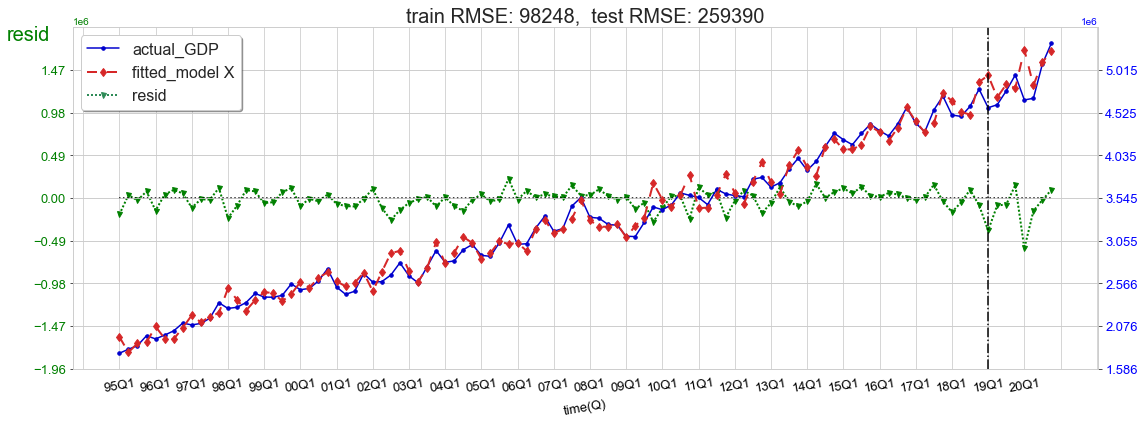

In [348]:
start,end='1995Q1','2020Q4'
endog= 'GDP'
nadata = nadata.loc[start:end]
time = ''.join(str(datetime.datetime.today()).replace(' ','-').replace(':','-').split('-')[1:-1])
model_name='model X'
line(y=nadata[endog], # 真實值序列
     yh=predictDf[endog], # 預測值序列
     model_name=model_name, # 會顯示在圖例及檔名
     savePath=f'../圖/{model_name}_{endog}_{time}.png', #儲存圖的路徑
     resid_ybound=True) # 與真實值y的縱軸級距相同

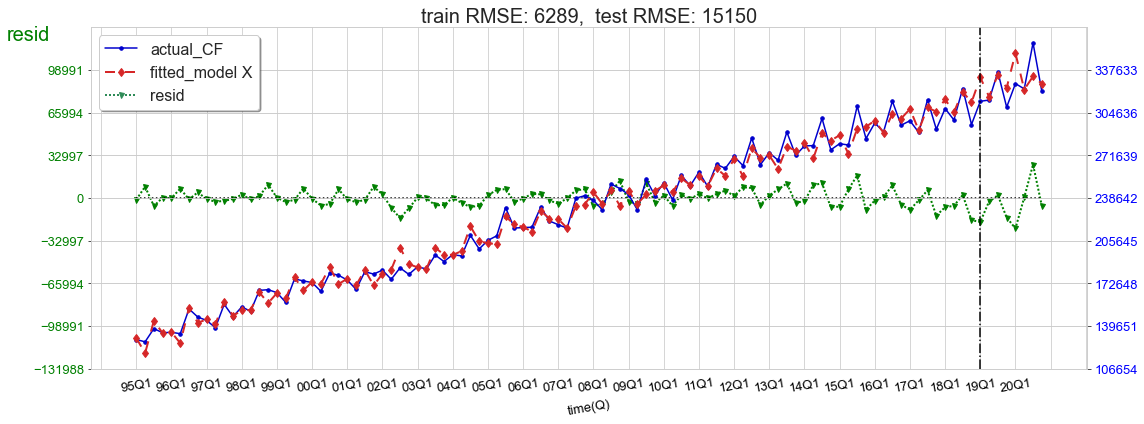

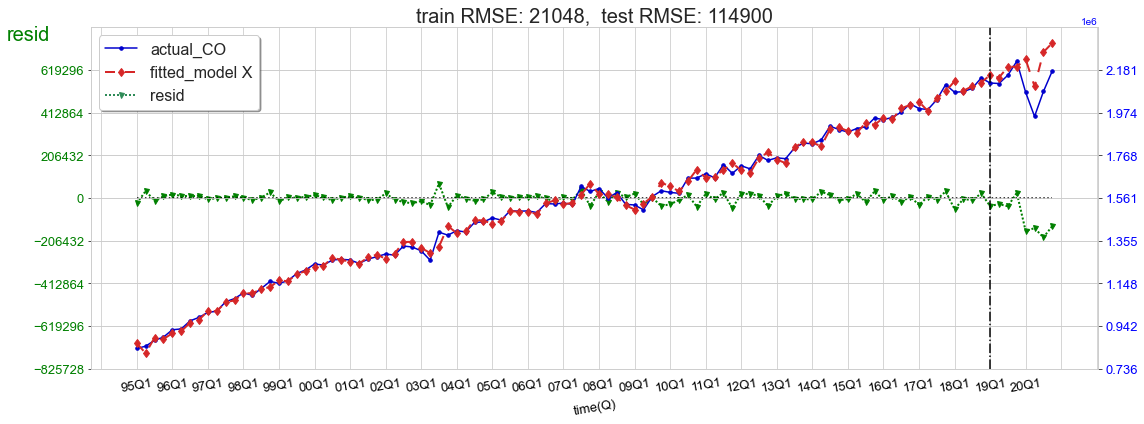

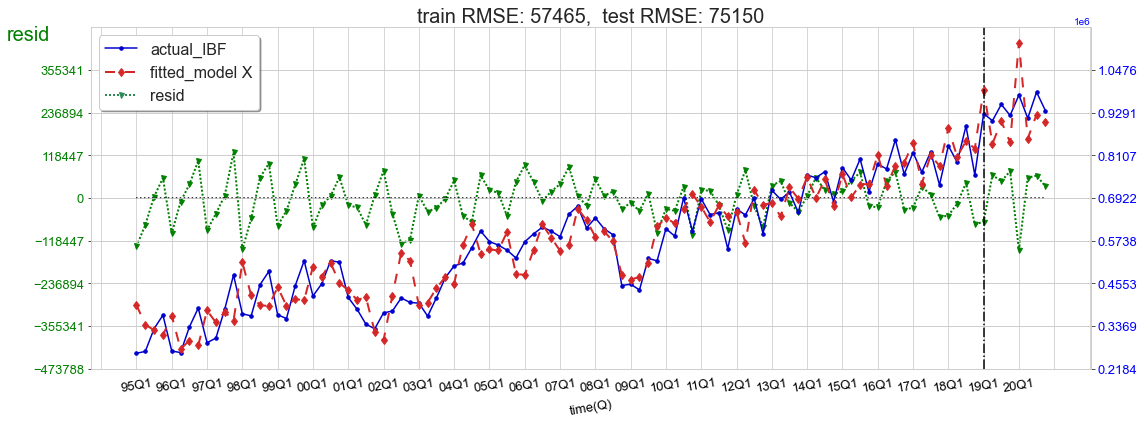

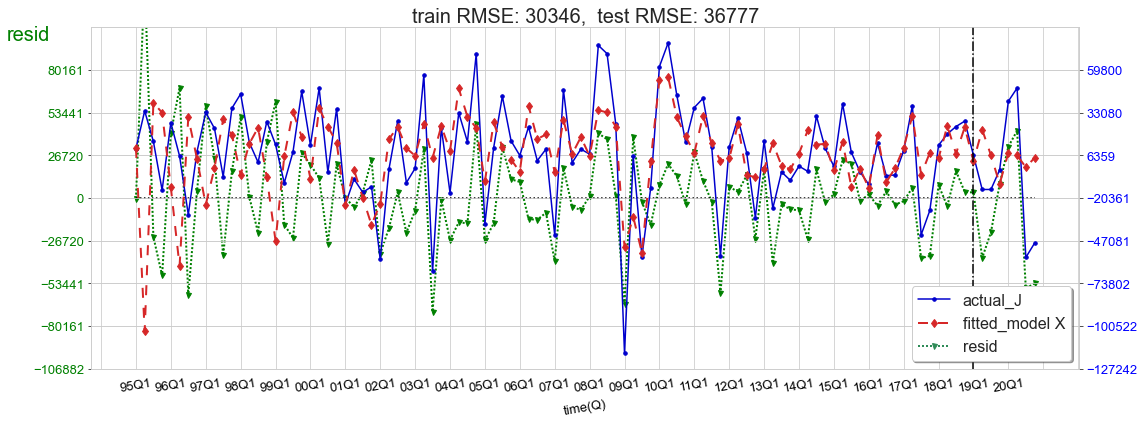

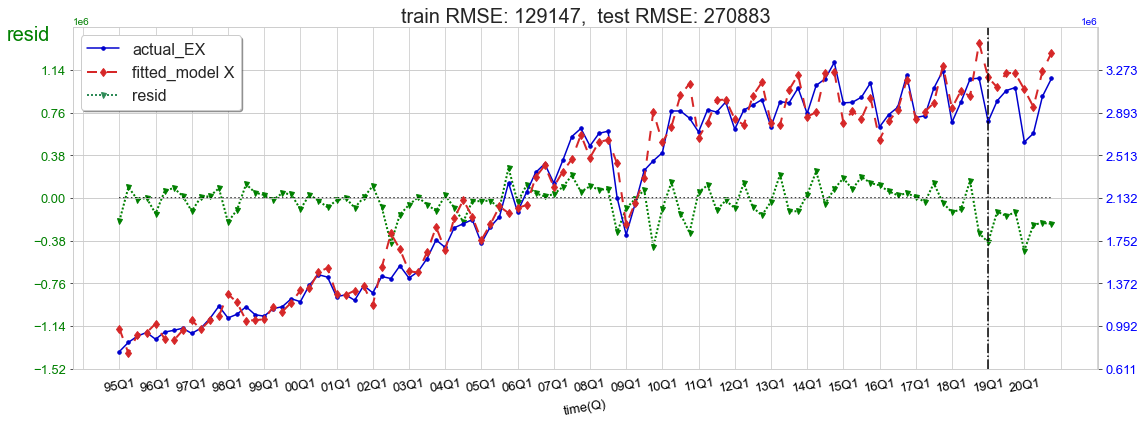

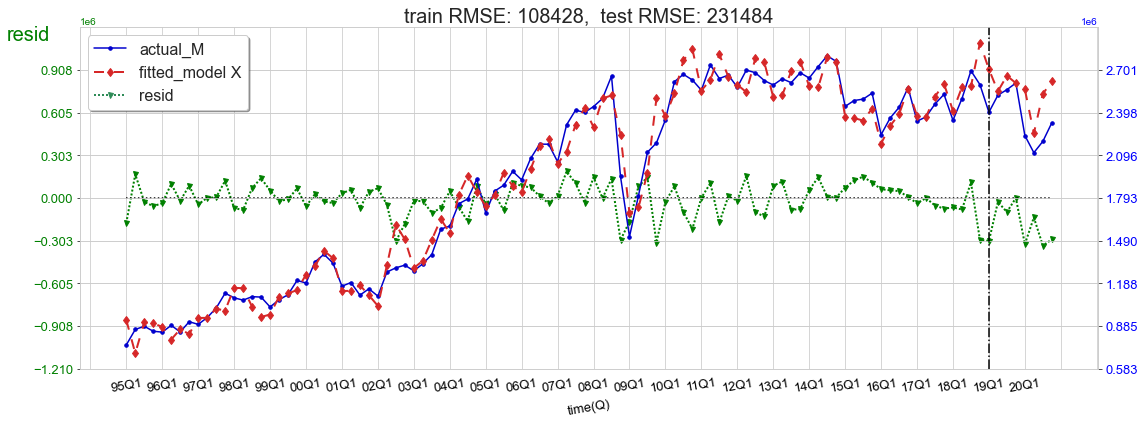

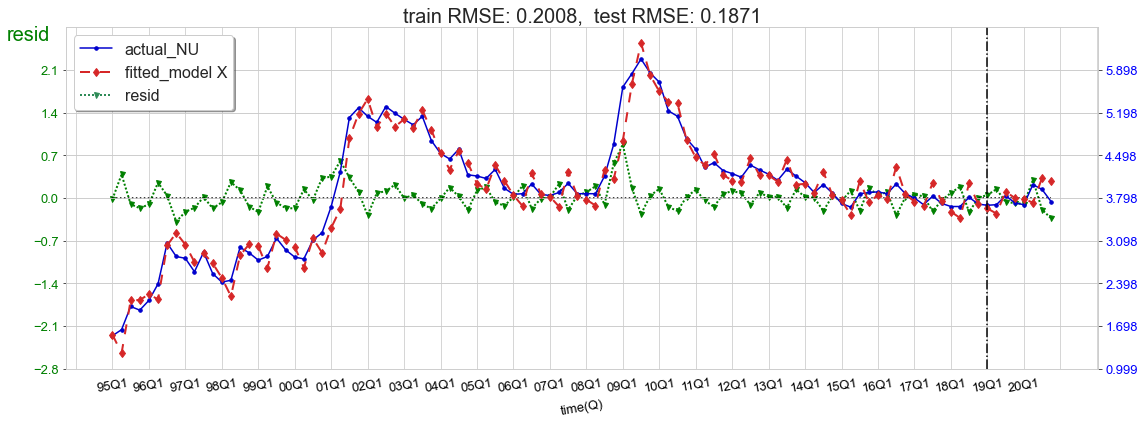

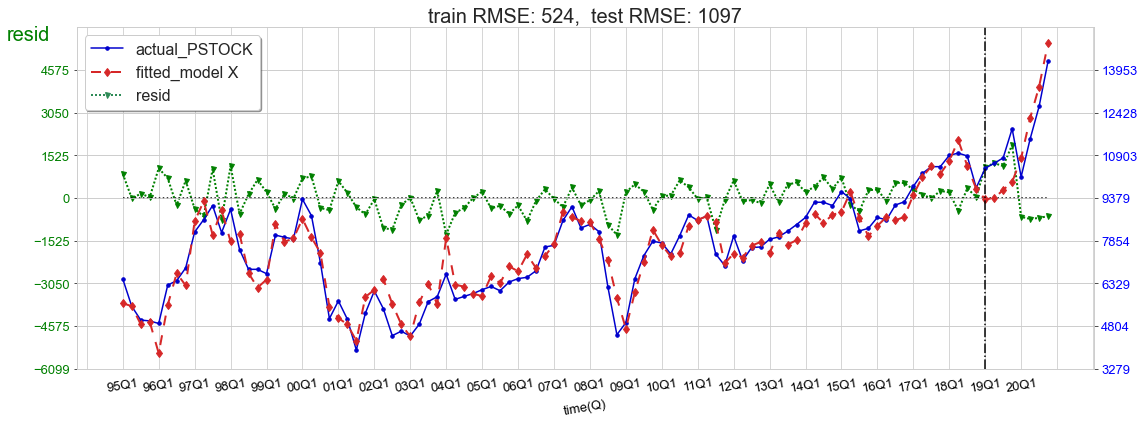

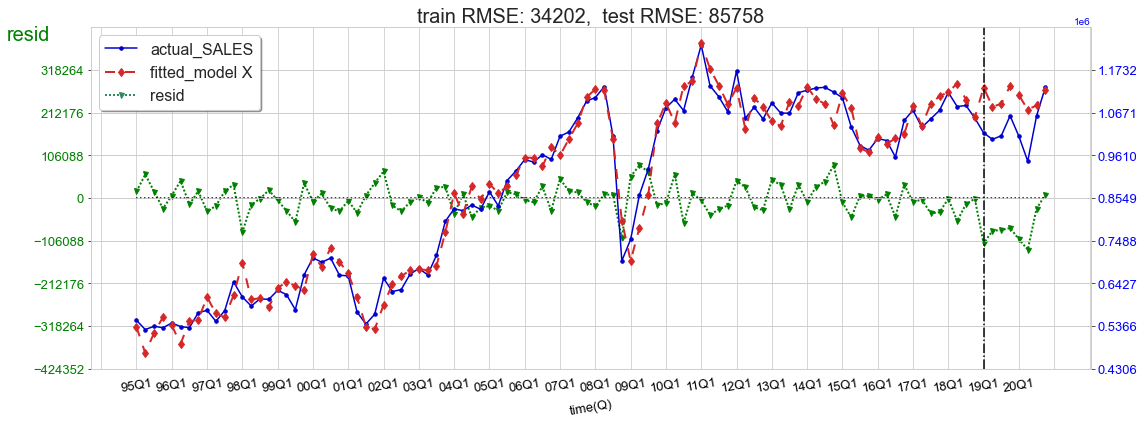

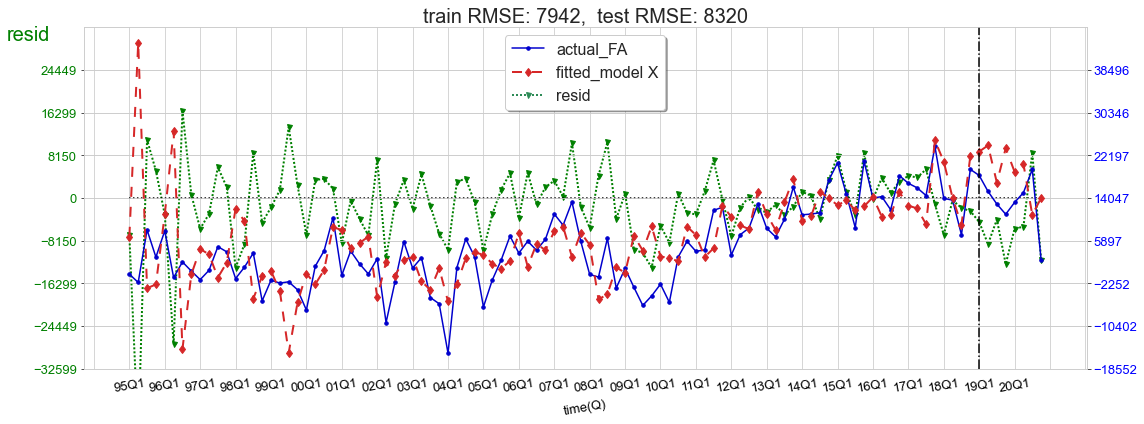

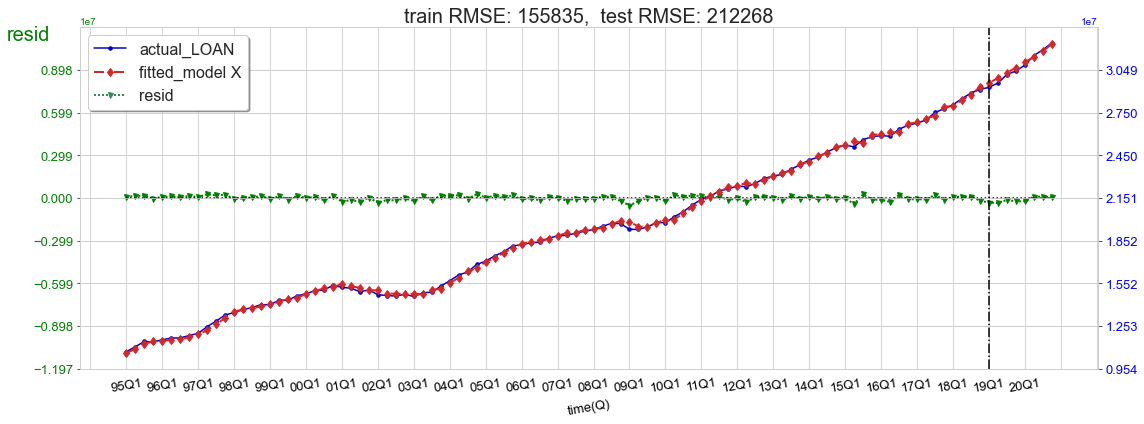

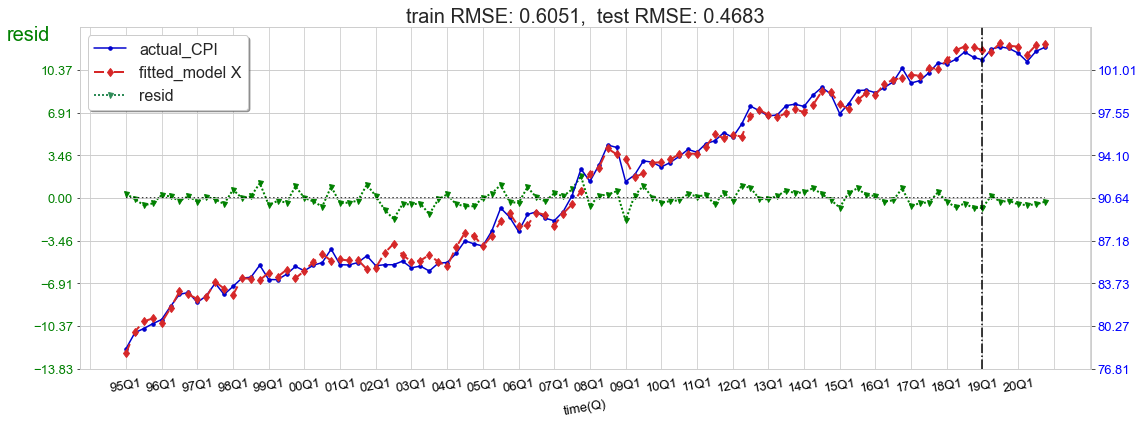

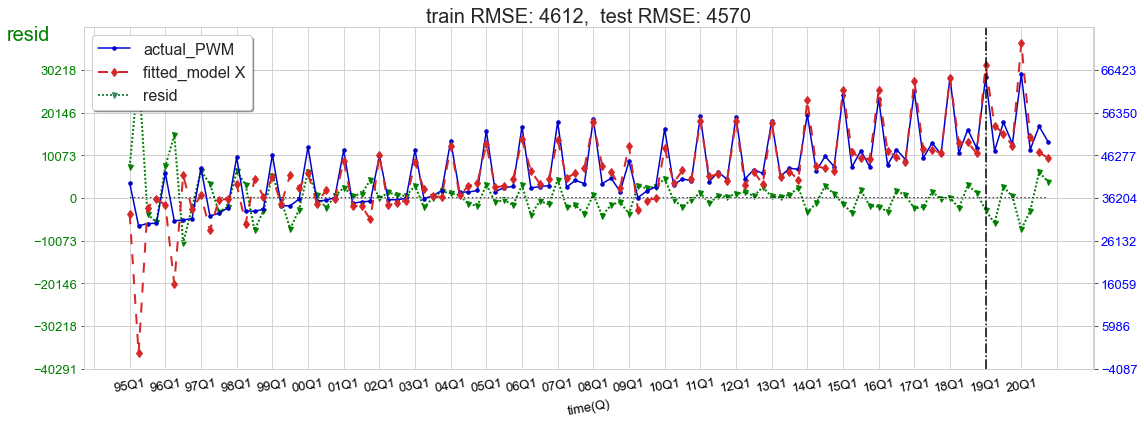

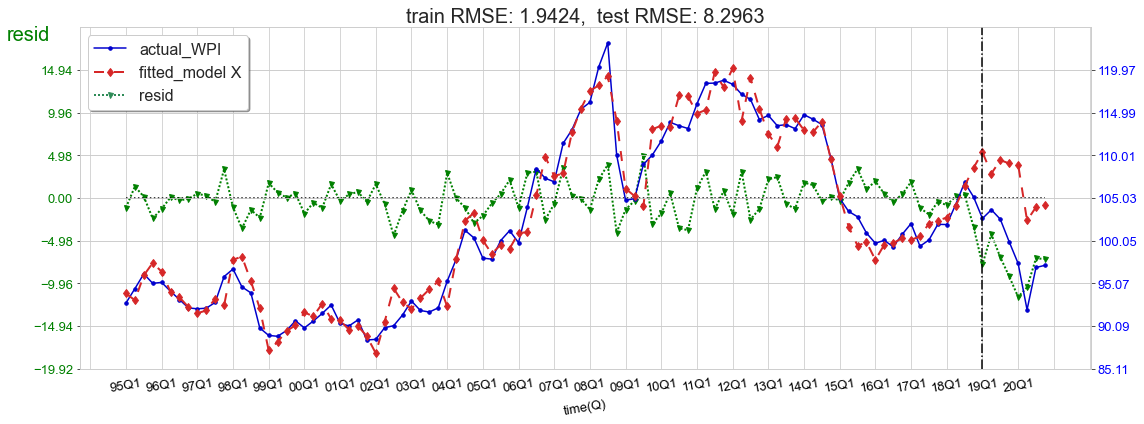

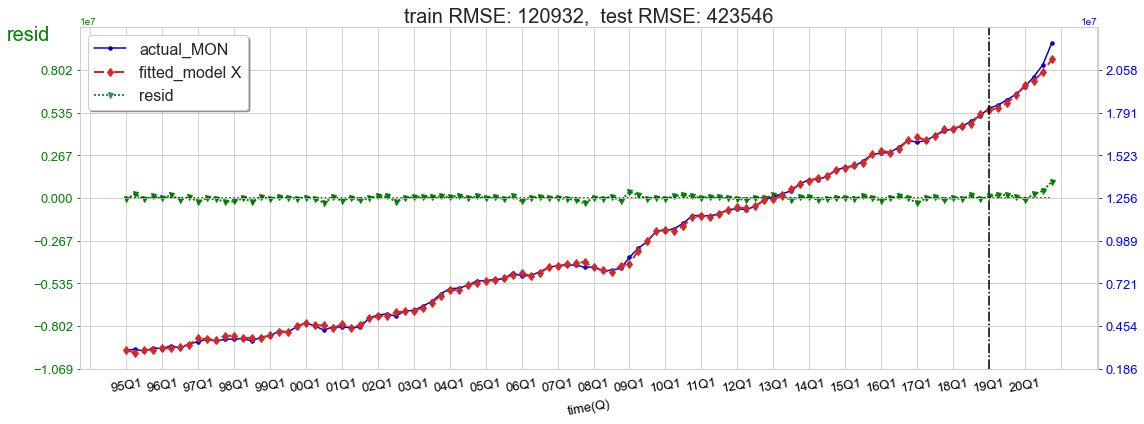

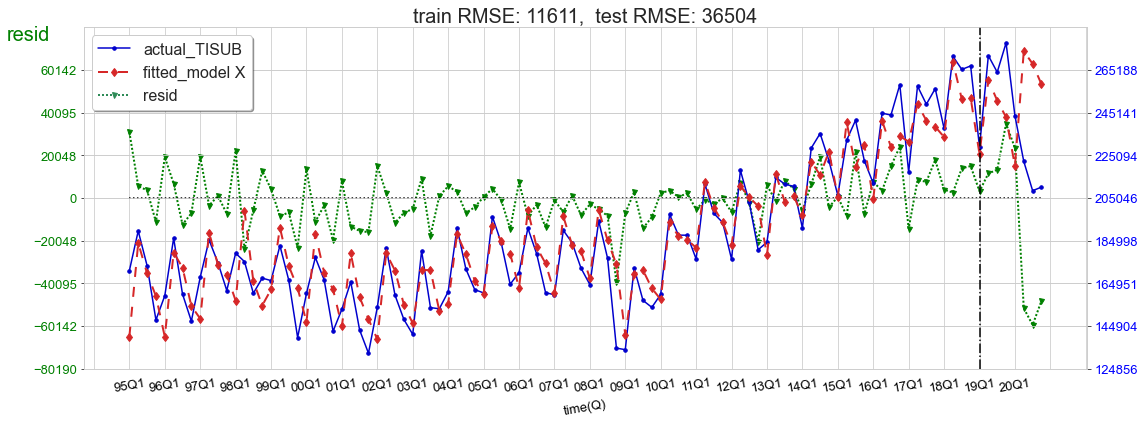

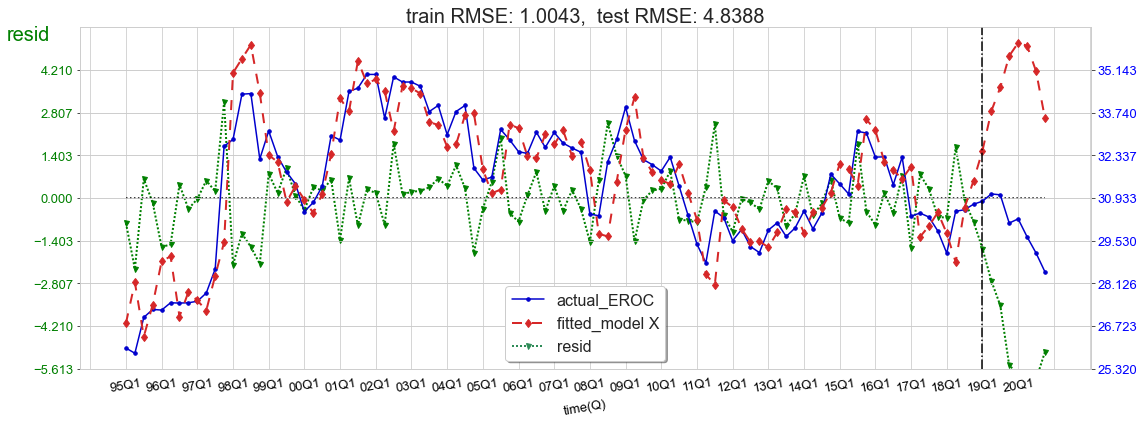

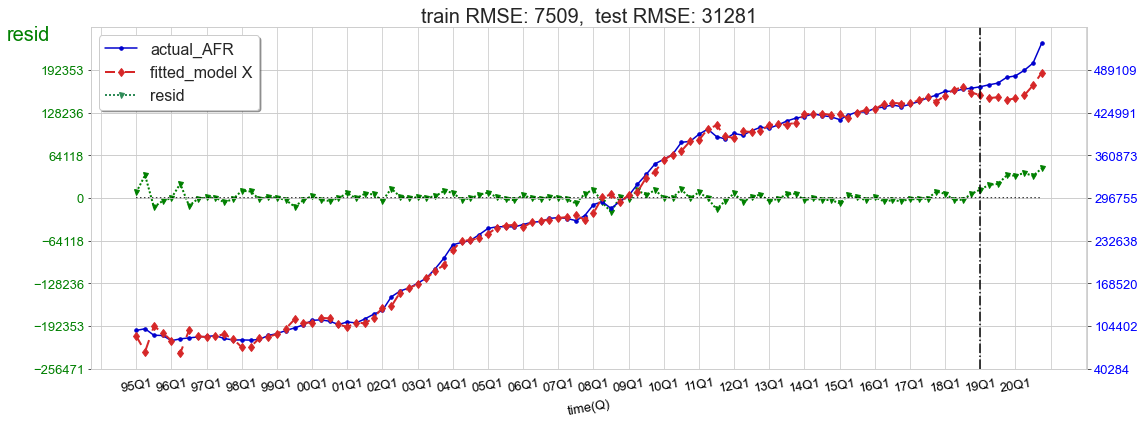

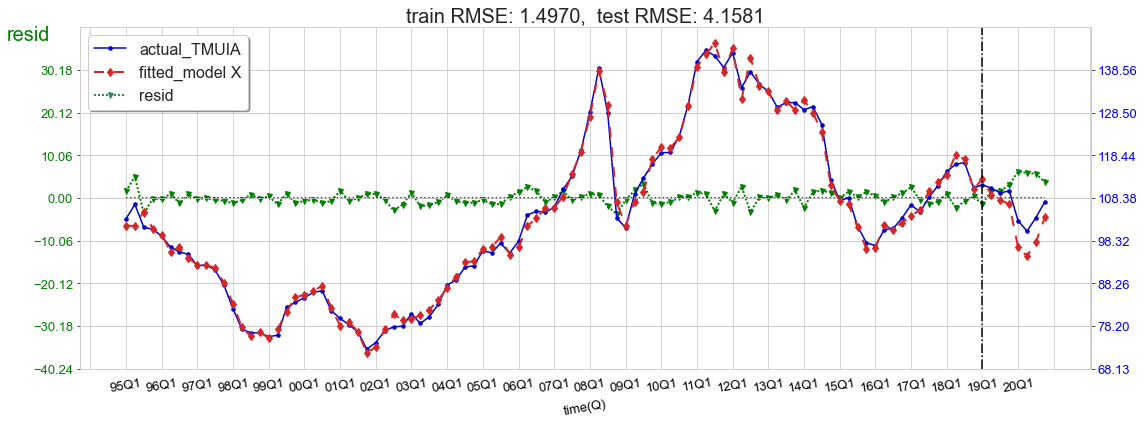

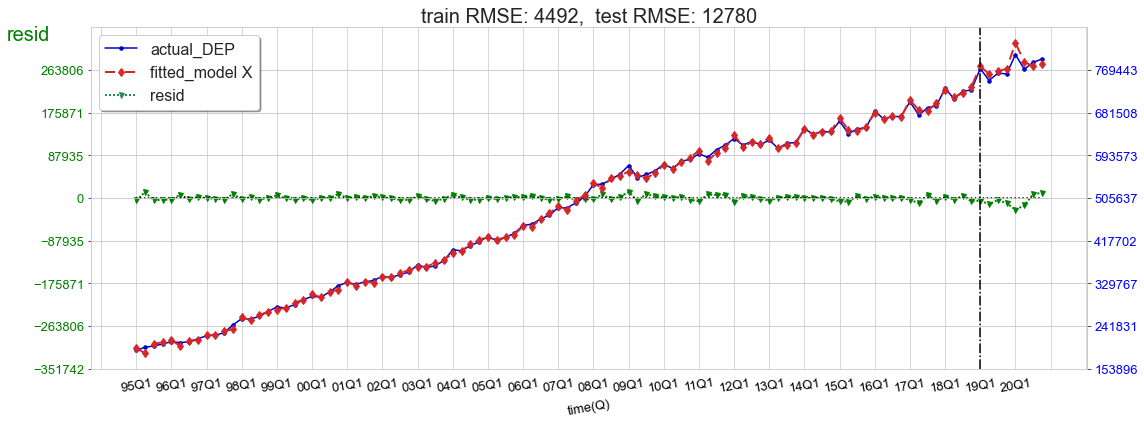

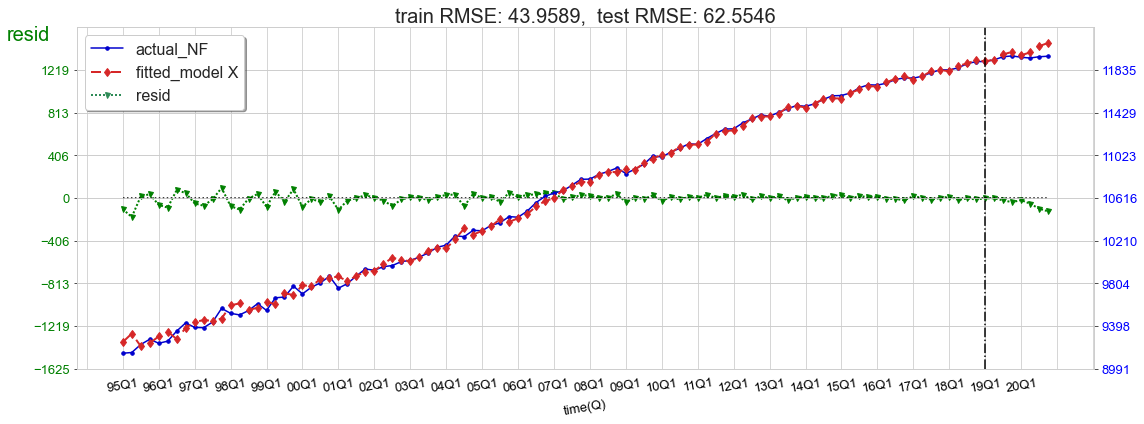

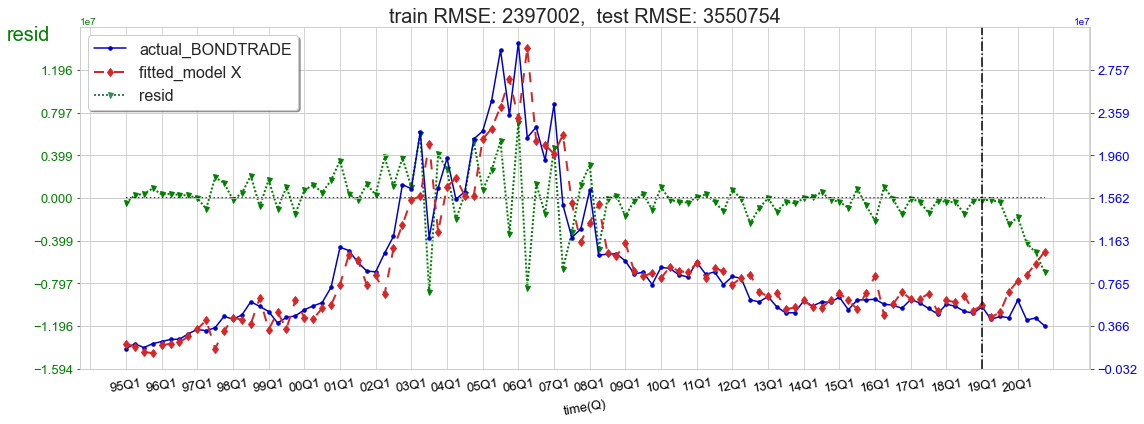

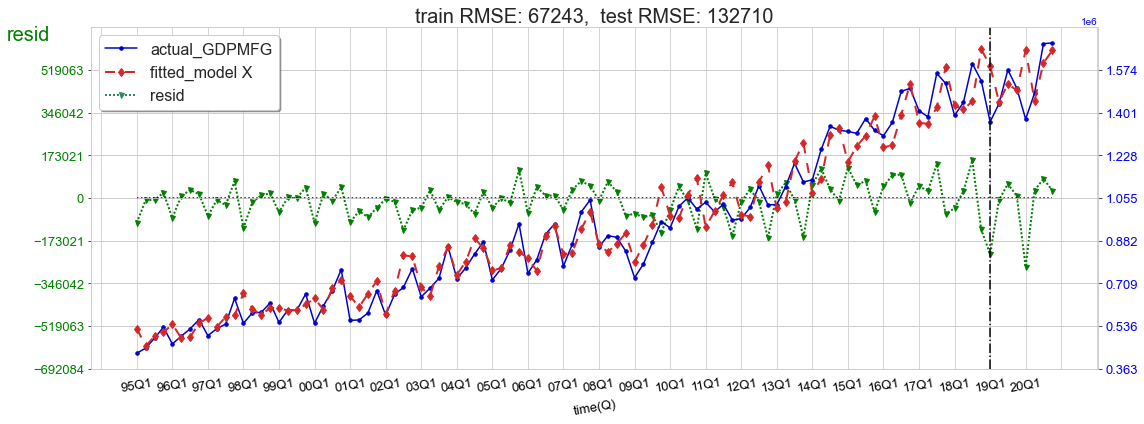

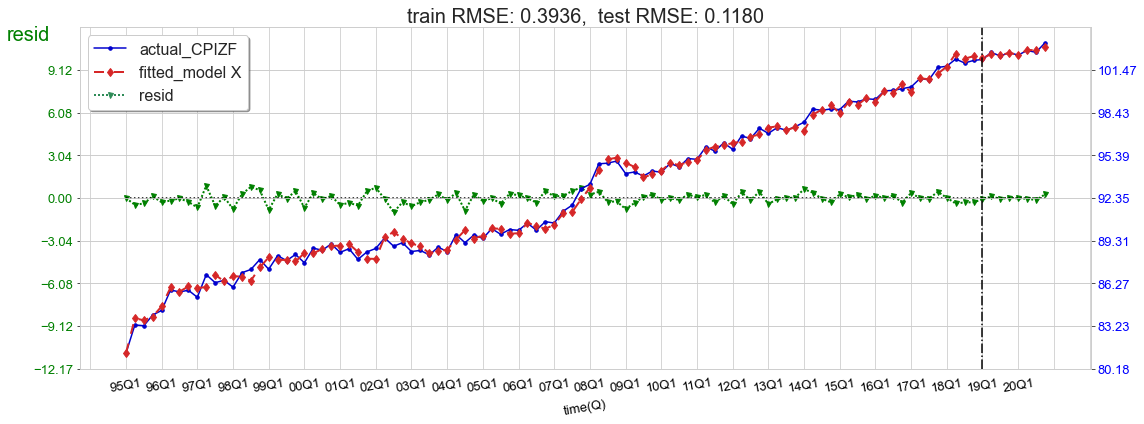

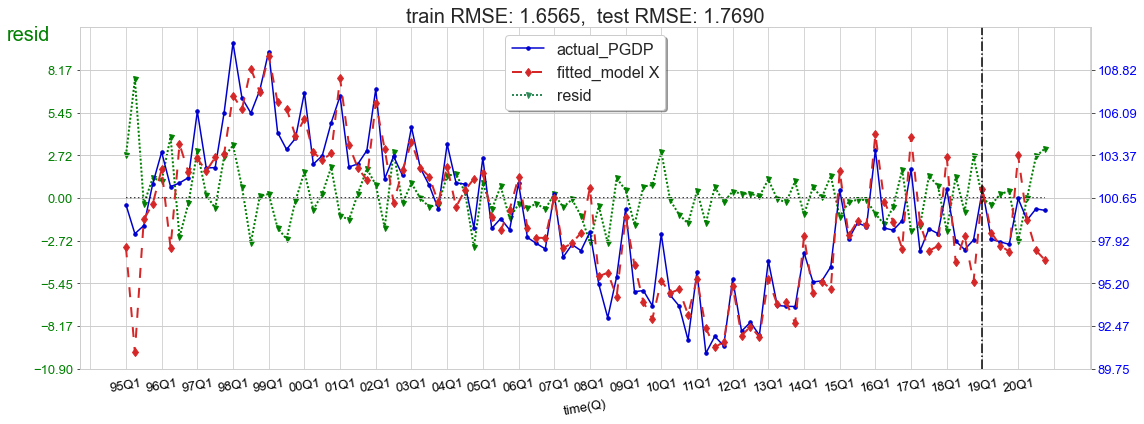

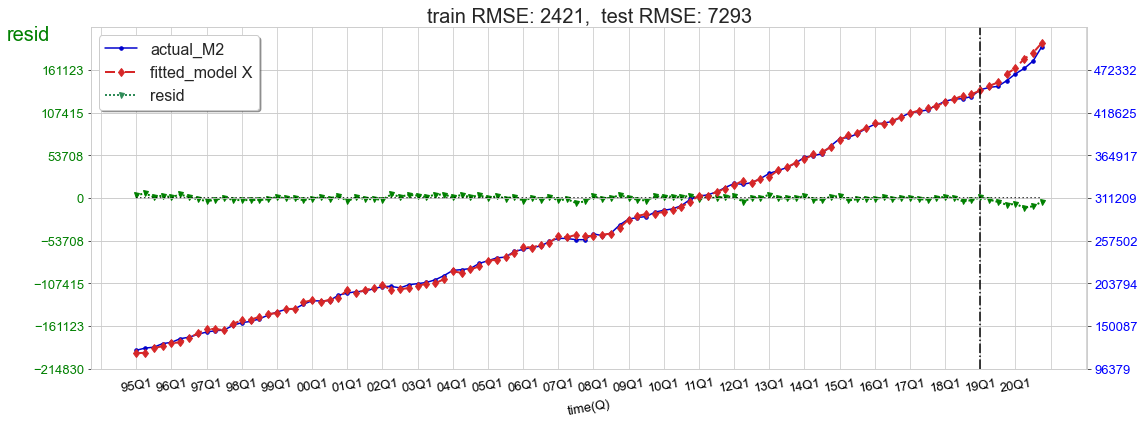

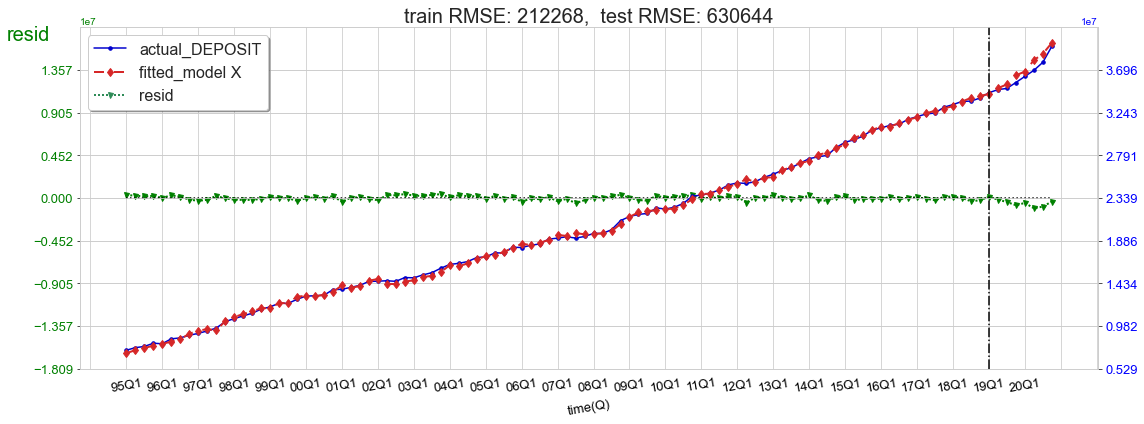

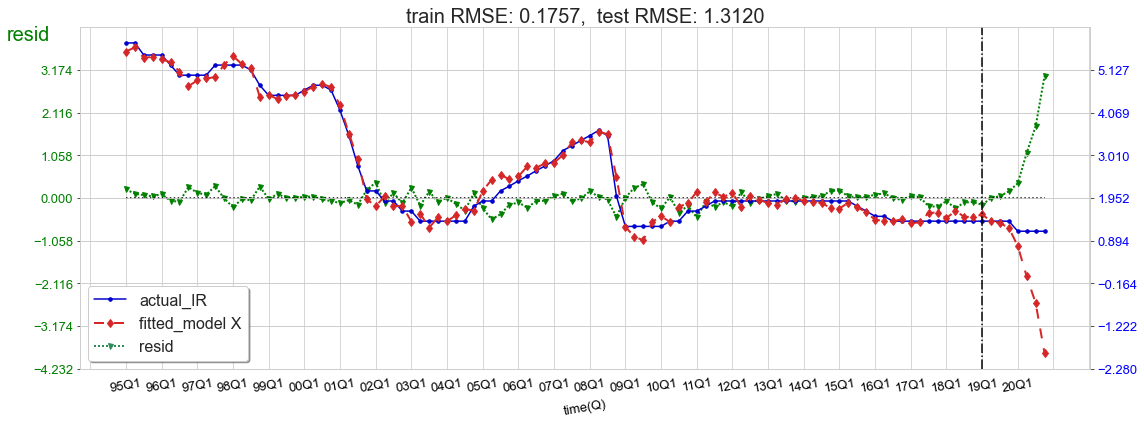

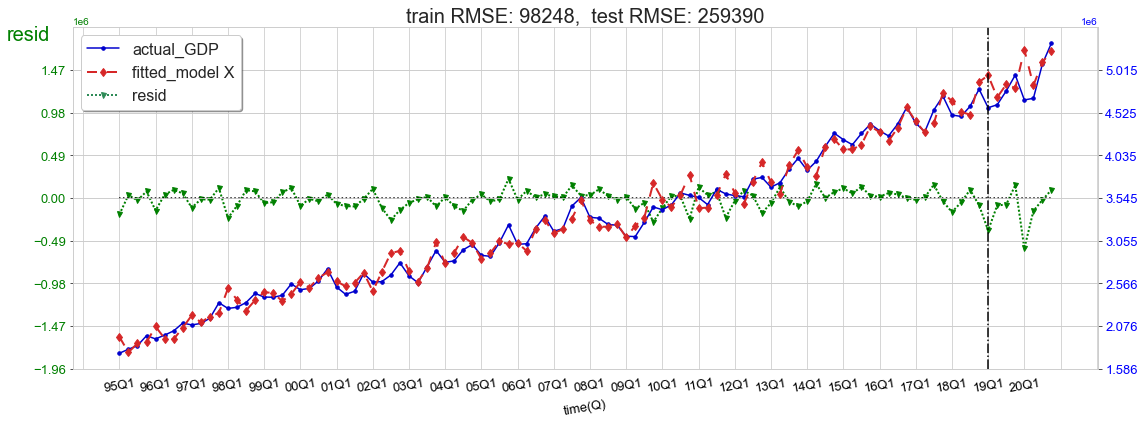

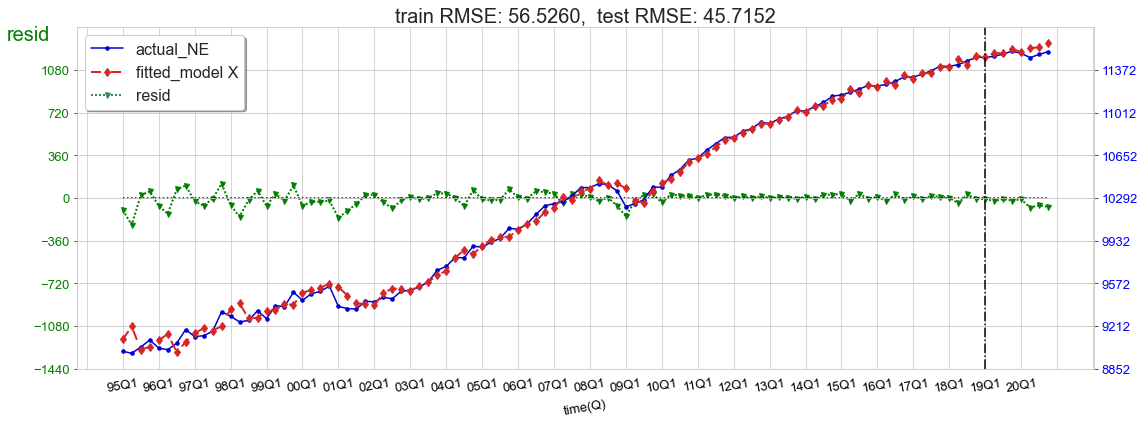

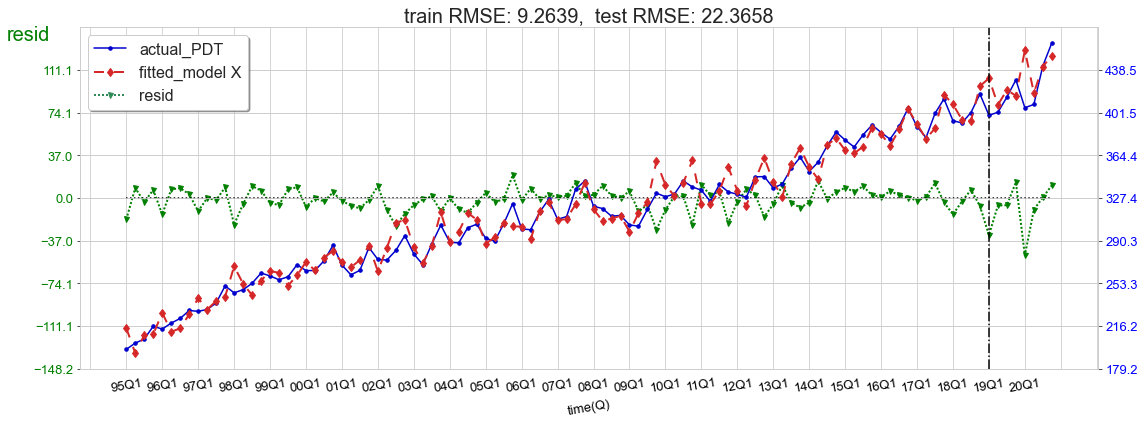

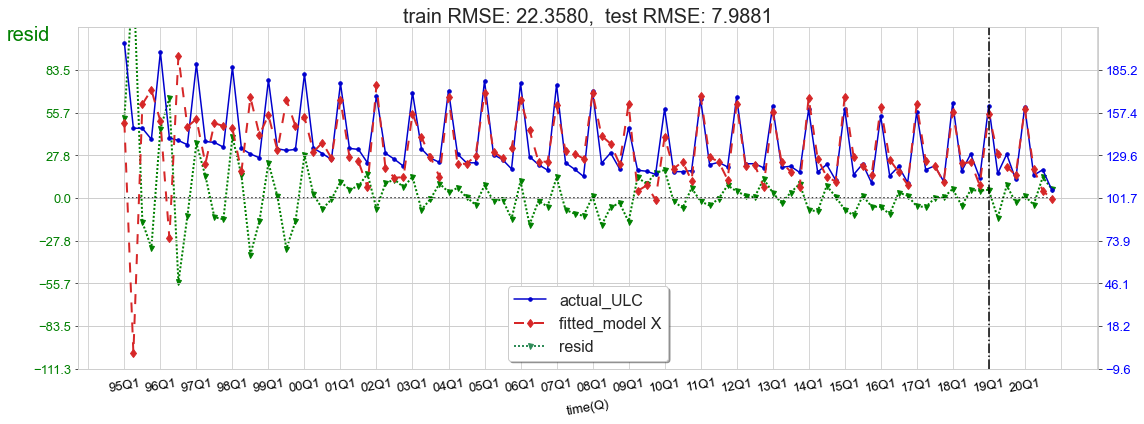

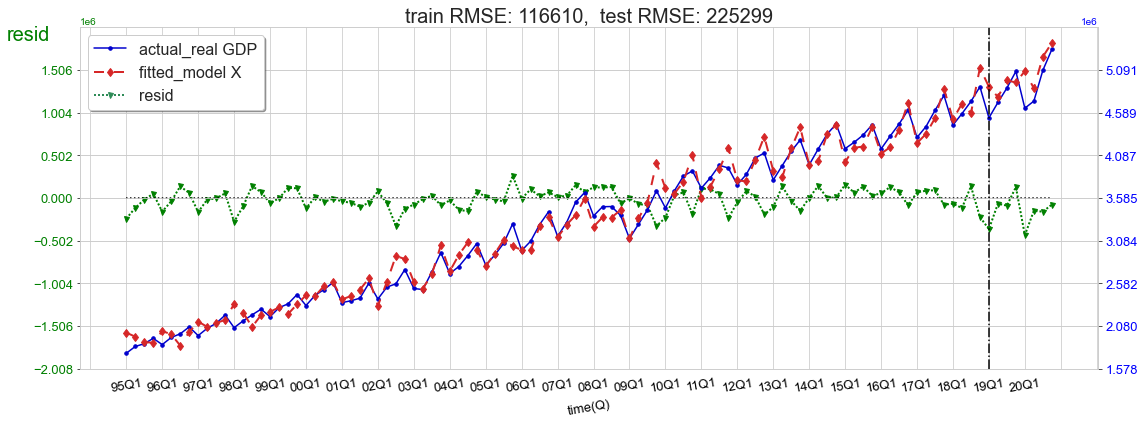

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

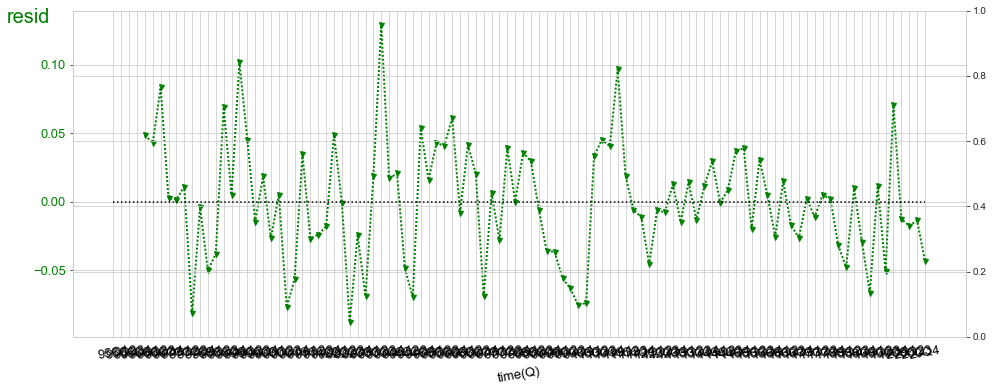

In [351]:
start,end='1995Q1','2020Q4'
for endog in predictDf.columns:
    nadata = nadata.loc[start:end]
    time = ''.join(str(datetime.datetime.today()).replace(' ','-').replace(':','-').split('-')[1:-1])
    model_name='model X'
    line(y=nadata[endog],
         yh=predictDf[endog],
         model_name=model_name,
         savePath=f'../圖/{model_name}_{endog}_{time}.png',
         resid_ybound=True)

# -----------------------------------------------------------------